In [1]:
import pandas as pd
import glob
import os
import re

# Папка или список папок с CSV-файлами
folder_path = ["csv_tg_labeled_position", "csv_web_labeled_position"]

# Приводим к списку
if isinstance(folder_path, str):
    folder_path = [folder_path]

# Собираем все CSV из указанных папок
csv_files = []
for path in folder_path:
    csv_files.extend(glob.glob(os.path.join(path, "*.csv")))

df_list = []
for file in csv_files:
    df_temp = pd.read_csv(file)
    
    # Чистим названия колонок от пробелов и дубликатов
    df_temp.columns = df_temp.columns.str.strip()
    df_temp = df_temp.loc[:, ~df_temp.columns.duplicated()]
    
    # Удаляем колонку position.1, если есть
    if 'position.1' in df_temp.columns:
        df_temp = df_temp.drop(columns=['position.1'])
    
    # Готовим маппинг переименований
    rename_map = {}
    if 'salary_from' in df_temp.columns:
        rename_map['salary_from'] = 'salary from'
    if 'salary_to' in df_temp.columns:
        rename_map['salary_to'] = 'salary to'
    if 'vacancy name' in df_temp.columns:
        if 'position' in df_temp.columns:
            df_temp = df_temp.drop('position', axis=1)
        rename_map['vacancy name'] = 'position'
    if 'experience level' in df_temp.columns:
        rename_map['experience level'] = 'level'
    
    # Применяем переименования
    if rename_map:
        df_temp = df_temp.rename(columns=rename_map)
    
    # Удаляем колонки Unnamed:*
    unnamed_cols = [col for col in df_temp.columns if re.match(r"^Unnamed:.*", col)]
    if unnamed_cols:
        df_temp = df_temp.drop(columns=unnamed_cols)
    
    # Определяем источник по имени файла
    filename = os.path.basename(file).replace(".csv", "")
    source_name = re.sub(r"(position|labeled|result)", "", filename, flags=re.IGNORECASE)
    source_name = re.sub(r"_+", "_", source_name)  # заменяем множественные _ на один
    source_name = source_name.strip("_")  # убираем _ в начале/конце
    df_temp['source'] = source_name
    
    df_list.append(df_temp)

# Объединяем в один DataFrame
df = pd.concat(df_list, ignore_index=True)

# Вывод value_counts для указанных признаков
columns_to_check = [
    "country",
    "experience",
    "employment",
    "schedule",
    "currency",
    "level"
]

for col in columns_to_check:
    if col in df.columns:
        print(f"\n--- {col} ---")
        print(df[col].value_counts(dropna=False))
    else:
        print(f"\n!!! Колонка '{col}' не найдена в DataFrame")

# Общая информация
print("\n=== Информация о DataFrame ===")
print(df.info())


--- country ---
country
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [2]:
# Фильтруем строки, где и country, и city пустые (NaN или пустая строка)
mask = (
    (df['country'].isna() | (df['country'].astype(str).str.strip() == "")) &
    (df['city'].isna() | (df['city'].astype(str).str.strip() == ""))
)

# Временное отключение обрезки текста
with pd.option_context('display.max_colwidth', None):
    examples = df.loc[mask, 'text'].head(10)
    for i, t in enumerate(examples, start=1):
        print(f"\n=== Пример {i} ===\n{t}")



=== Пример 1 ===
Добрый день! Меня зовут Виктория. Нахожусь в поиске работы в качестве начинающего Бизнес-аналитика. 

Формат работы: полная занятость, офис/гибрид. 

**ОСНОВНОЙ СТЕК**

**Инструменты и платформы**
MS Excel, Power BI , 1С:П редприятие, Loginom, ARIS , Comunda BPM,
AllFusion Process Modeler, Draw.io, Tilda, Figma, MS Power Point,
MS Word
**Нотации и моделирование**
UML, BPMN, IDEF0, IDEF 3, DFD

**ОБРАЗОВАНИЕ**
РАНХиГС, Факультет ИТ и анализа данных
Магистр бизнес-информатики. Бизнес-аналитика (2025)
РАНХиГС, Факультет ИТ и анализа данных
Бакалавр бизнес-информатики. Бизнес-аналитика (2023)

**ДОПОЛНИТЕЛЬНОЕ ОБРАЗОВАНИЕ**
- 2025: KARPOV.COURSES | Симулятор SQL (прохожу на данный момент)
- 2025: Stepik | Интерактивный тренажер по SQL (прохожу на данный момент) 
- 2025: Практика в роли системного администратора
- 2024: Юридическое сопровождение малого и среднего бизнеса,
РАНХиГС (504 часа) | конкурентное право
- 2022: Практика в 1С

Контакты:
тел: +79267646683
тг: @l_Niku

In [3]:
df[mask].shape[0]

2979

In [4]:
df[mask]['schedule'].value_counts().head(50)

schedule
удаленно                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               301
удаленная работа                                                                                                                                                                                                                                                                                                                                    

In [ ]:
# Фильтруем строки, где и country, и city пустые (NaN или пустая строка)
mask = (
    (df['country'].isna() | (df['country'].astype(str).str.strip() == "")) &
    (df['city'].isna() | (df['city'].astype(str).str.strip() == ""))
)

# Временное отключение обрезки текста
with pd.option_context('display.max_colwidth', None):
    examples = df.loc[mask, 'text'].head(5)
    for i, t in enumerate(examples, start=1):
        print(f"\n=== Пример {i} ===\n{t}")


=== Пример 1 ===
Добрый день! Меня зовут Виктория. Нахожусь в поиске работы в качестве начинающего Бизнес-аналитика. 

Формат работы: полная занятость, офис/гибрид. 

**ОСНОВНОЙ СТЕК**

**Инструменты и платформы**
MS Excel, Power BI , 1С:П редприятие, Loginom, ARIS , Comunda BPM,
AllFusion Process Modeler, Draw.io, Tilda, Figma, MS Power Point,
MS Word
**Нотации и моделирование**
UML, BPMN, IDEF0, IDEF 3, DFD

**ОБРАЗОВАНИЕ**
РАНХиГС, Факультет ИТ и анализа данных
Магистр бизнес-информатики. Бизнес-аналитика (2025)
РАНХиГС, Факультет ИТ и анализа данных
Бакалавр бизнес-информатики. Бизнес-аналитика (2023)

**ДОПОЛНИТЕЛЬНОЕ ОБРАЗОВАНИЕ**
- 2025: KARPOV.COURSES | Симулятор SQL (прохожу на данный момент)
- 2025: Stepik | Интерактивный тренажер по SQL (прохожу на данный момент) 
- 2025: Практика в роли системного администратора
- 2024: Юридическое сопровождение малого и среднего бизнеса,
РАНХиГС (504 часа) | конкурентное право
- 2022: Практика в 1С

Контакты:
тел: +79267646683
тг: @l_Niku

In [6]:
# Фильтруем строки, где и salary from, и salary to пустые (NaN или пустая строка)
mask = (
    (df['salary from'].isna() | (df['salary from'].astype(str).str.strip() == "")) &
    (df['salary to'].isna() | (df['salary to'].astype(str).str.strip() == ""))
)

# Временное отключение обрезки текста
with pd.option_context('display.max_colwidth', None):
    examples = df.loc[mask, 'text'].head(10)
    for i, t in enumerate(examples, start=1):
        print(f"\n=== Пример {i} ===\n{t}")


=== Пример 1 ===
**#удаленно**** ****#рф**** ****#аутстафф****

Аутстафф компания Новэлект в поисках


Системный аналитик/Senior **

**Мосбиржа, проект:** Аламеда: КД НРД. Аламеда
**Формат:** удаленно, РФ, +-2 часа по мск времени
ЗП: отталкиваемся от ожиданий кандидата 

**Основные задачи:**
✔️Сбор, анализ и уточнение бизнес-требований от заказчика и владельцев продукта.
✔️Разработка и описание функциональных и нефункциональных требований.
✔️Поддержка и актуализация документации по проекту.
✔️Проектирование архитектуры и функциональности сервисов в соответствии с требованиями.
✔️Составление технических заданий для разработки.

**Взаимодействие с командой разработки:**
✅Постановка задач разработчикам и контроль их выполнения.
✅Участие в обсуждениях архитектурных решений и технических вопросов.

**Обучение и поддержка пользователей:**
✅Обучение пользователей и подготовка обучающих материалов.
✅Поддержка пользователей и решение возникающих вопросов

**Требования:**
✅Опыт работы системным

In [7]:
df[mask].shape[0]

3508

In [8]:
df_copy = df[~mask]

In [9]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12934 entries, 0 to 16441
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   text              12934 non-null  object 
 1   date              9605 non-null   object 
 2   vacancy           12934 non-null  object 
 3   company           11326 non-null  object 
 4   city              8477 non-null   object 
 5   country           4174 non-null   object 
 6   experience        8207 non-null   object 
 7   employment        11720 non-null  object 
 8   schedule          9357 non-null   object 
 9   salary from       11884 non-null  object 
 10  salary to         7653 non-null   object 
 11  currency          12494 non-null  object 
 12  skills            11971 non-null  object 
 13  responsibilities  10650 non-null  object 
 14  requirements      11151 non-null  object 
 15  level             8831 non-null   object 
 16  uid               6802 non-null   object 
 17

In [10]:
df_copy['position'].value_counts()

position
Программист, разработчик                        4305
DevOps-инженер                                  1488
Тестировщик                                     1246
Системный администратор                          866
Не IT вакансия                                   779
Специалист технической поддержки                 655
Системный аналитик                               594
Другая IT вакансия                               573
Специалист по информационной безопасности        296
Системный инженер                                275
Менеджер продукта                                269
Руководитель группы разработки                   241
Бизнес-аналитик                                  174
Аналитик                                         158
BI-аналитик, аналитик данных                     147
Дата-сайентист                                   146
Руководитель проектов                            138
Сетевой инженер                                  130
Технический директор (СТО)           

In [11]:
hh_data = pd.read_csv('data/stage_3_df_cluster_vac_to_model_4.csv')
hh_data['position'].value_counts()

position
Программист, разработчик                        3673
Специалист технической поддержки                2374
Системный администратор                         1692
Дизайнер, художник                              1572
Аналитик                                        1056
Руководитель проектов                            858
Специалист по информационной безопасности        721
Менеджер продукта                                459
Тестировщик                                      328
Бизнес-аналитик                                  314
Системный аналитик                               292
Системный инженер                                251
Сетевой инженер                                  235
BI-аналитик, аналитик данных                     225
Методолог                                        189
DevOps-инженер                                   142
Технический писатель                             126
Технический директор (CTO)                       111
Руководитель группы разработки       

In [12]:
df_combined = pd.concat([df_copy, hh_data], ignore_index=True)

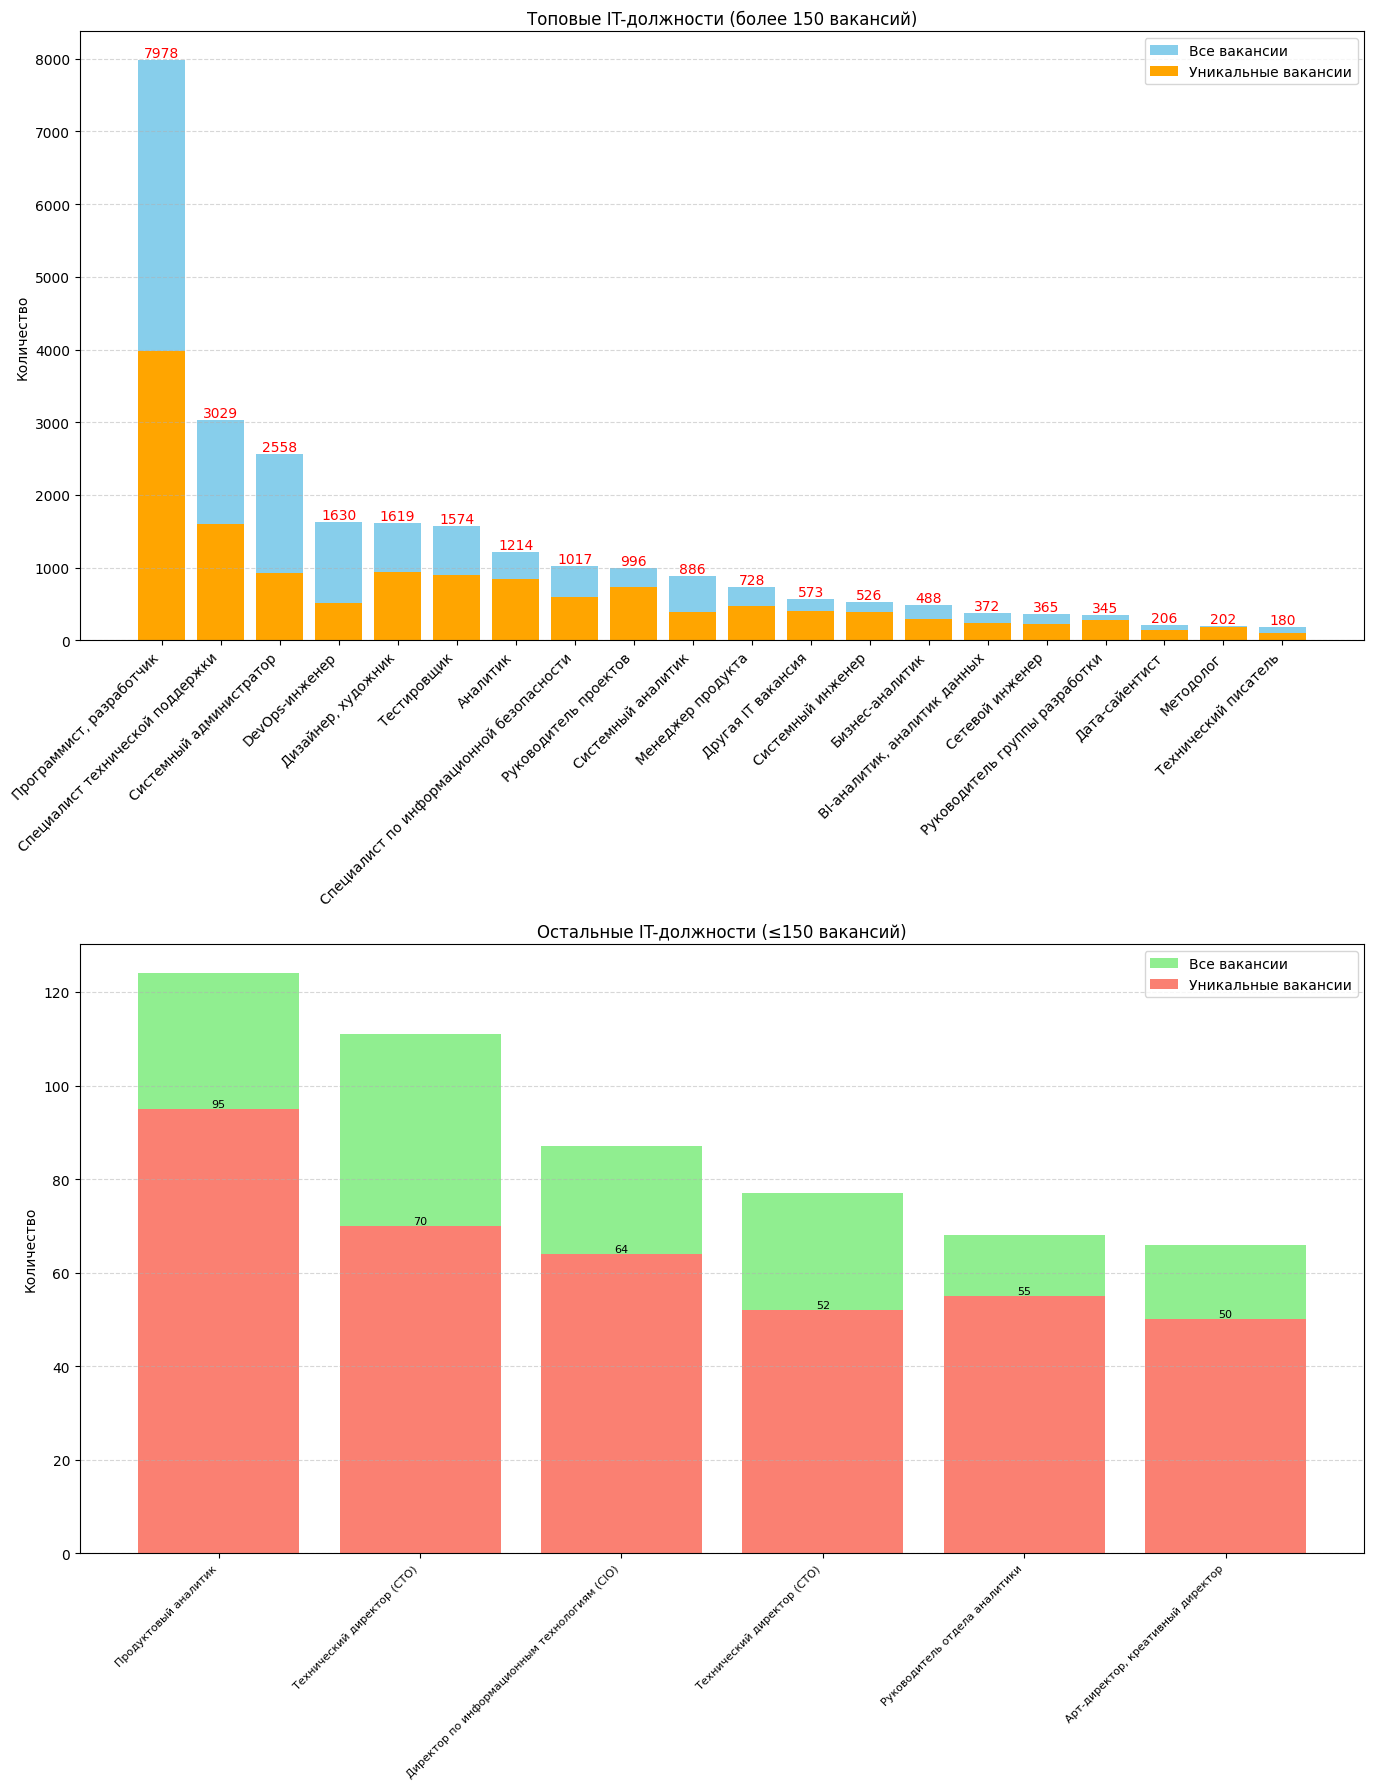

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from tqdm import tqdm
import re

# Группировка данных
grouped = df_combined[(df_combined['position'] != 'Не IT вакансия') & (df_combined['position'] != 'Другая IT вакансияНе IT вакансия') ].groupby('position')['vacancy'].agg(['nunique', 'count']).sort_values('count', ascending=False)

# Разделение данных на две группы
top_positions = grouped[grouped['count'] > 150]
other_positions = grouped[(grouped['count'] <= 150) & (grouped['count'] > 10)]

# Настройка стиля графиков
plt.figure(figsize=(14, 18))

# --- График 1: Топовые должности (>150 вакансий) ---
plt.subplot(2, 1, 1)
bars = plt.bar(top_positions.index, top_positions['count'], color='skyblue', label='Все вакансии')
plt.bar(top_positions.index, top_positions['nunique'], color='orange', label='Уникальные вакансии')

# Добавляем подписи значений
for bar, uniq, total in zip(bars, top_positions['nunique'], top_positions['count']):
    #plt.text(bar.get_x() + bar.get_width()/2, uniq, f"{uniq}", ha='center', va='bottom', color='black')
    plt.text(bar.get_x() + bar.get_width()/2, total, f"{total}", ha='center', va='bottom', color='red')

plt.title('Топовые IT-должности (более 150 вакансий)')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# --- График 2: Остальные должности (≤150 вакансий) ---
plt.subplot(2, 1, 2)
bars = plt.bar(other_positions.index, other_positions['count'], color='lightgreen', label='Все вакансии')
plt.bar(other_positions.index, other_positions['nunique'], color='salmon', label='Уникальные вакансии')

# Подписи значений (только для уникальных, если их мало)
for bar, uniq in zip(bars, other_positions['nunique']):
    if uniq > 0:  # Чтобы не загромождать график
        plt.text(bar.get_x() + bar.get_width()/2, uniq, f"{uniq}", ha='center', va='bottom', fontsize=8)

plt.title('Остальные IT-должности (≤150 вакансий)')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right', fontsize=8)  # Уменьшаем шрифт, если много позиций
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

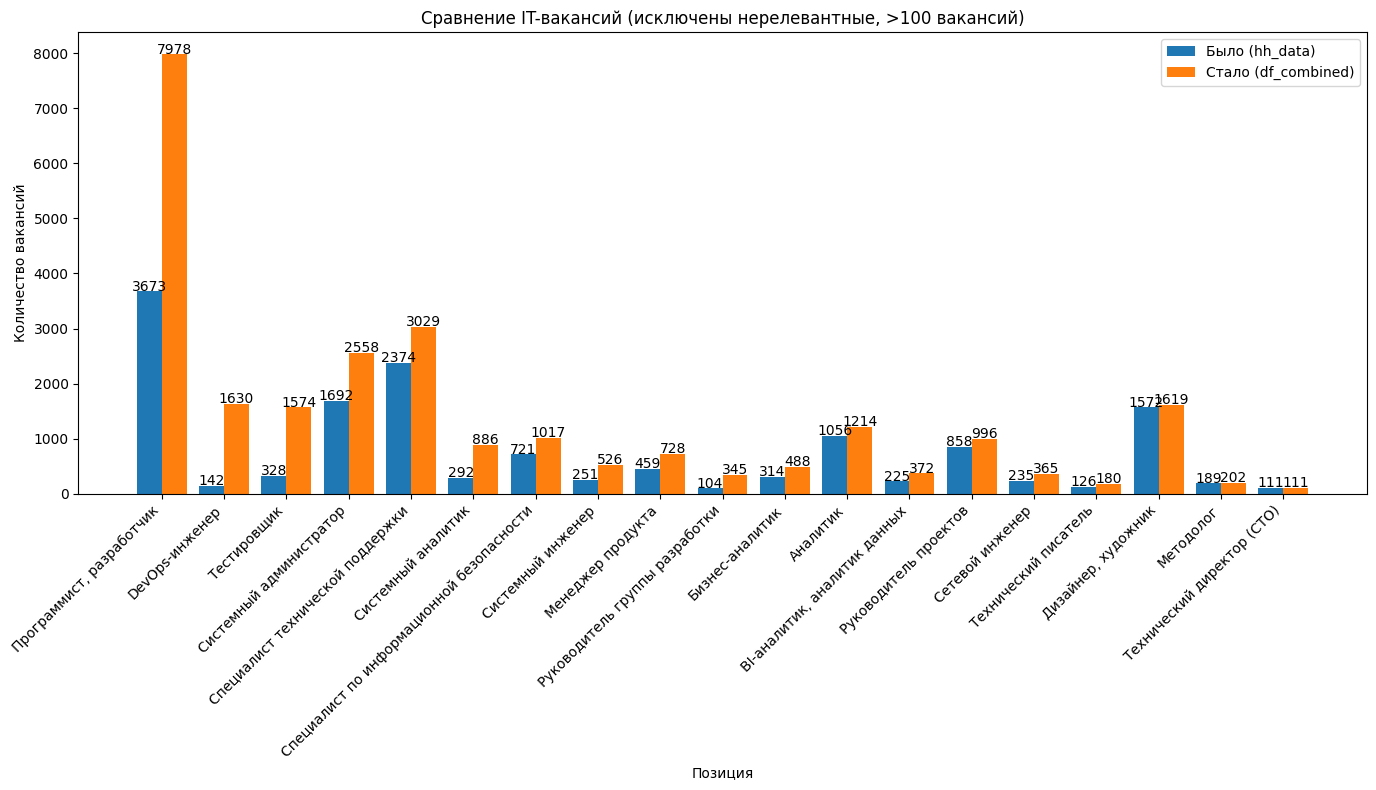

In [29]:
# Фильтрация данных (исключаем ненужные позиции и берем >100 строк)
excluded_positions = ['Не IT вакансия', 'Другая IT вакансияНе IT вакансия', 'Другая IT вакансия']

hh_filtered = hh_data[
    (~hh_data['position'].isin(excluded_positions)) &
    (hh_data['position'].map(hh_data['position'].value_counts()) > 100)
]

combined_filtered = df_combined[
    (~df_combined['position'].isin(excluded_positions)) &
    (df_combined['position'].map(df_combined['position'].value_counts()) > 100)
]

# Считаем количество вакансий
hh_counts = hh_filtered['position'].value_counts().reset_index()
hh_counts.columns = ['position', 'count_before']

combined_counts = combined_filtered['position'].value_counts().reset_index()
combined_counts.columns = ['position', 'count_after']

# Объединяем только общие позиции
comparison_df = pd.merge(hh_counts, combined_counts, on='position', how='inner')
comparison_df['difference'] = comparison_df['count_after'] - comparison_df['count_before']
comparison_df = comparison_df.sort_values('difference', ascending=False)

# Построение графика
plt.figure(figsize=(14, 8))
x = range(len(comparison_df))

plt.bar(x, comparison_df['count_before'], width=0.4, label='Было (hh_data)', color='#1f77b4')
plt.bar([i + 0.4 for i in x], comparison_df['count_after'], width=0.4, label='Стало (df_combined)', color='#ff7f0e')

plt.xticks([i + 0.2 for i in x], comparison_df['position'], rotation=45, ha='right')
plt.xlabel('Позиция')
plt.ylabel('Количество вакансий')
plt.title('Сравнение IT-вакансий (исключены нерелевантные, >100 вакансий)')

# Добавляем значения на столбцы
for i in x:
    plt.text(i, comparison_df['count_before'].iloc[i] + 10, 
             str(comparison_df['count_before'].iloc[i]), ha='center')
    plt.text(i + 0.4, comparison_df['count_after'].iloc[i] + 10, 
             str(comparison_df['count_after'].iloc[i]), ha='center')

plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
excluded_positions = ['Не IT вакансия', 'Другая IT вакансияНе IT вакансия', 'Другая IT вакансия']

In [32]:
positions_list = hh_data['position'].value_counts().index.tolist()
df = df_copy[df_copy['position'].isin(positions_list)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11394 entries, 5 to 16439
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   text              11394 non-null  object 
 1   date              9056 non-null   object 
 2   vacancy           11394 non-null  object 
 3   company           9810 non-null   object 
 4   city              7084 non-null   object 
 5   country           4060 non-null   object 
 6   experience        6911 non-null   object 
 7   employment        10421 non-null  object 
 8   schedule          8807 non-null   object 
 9   salary from       10424 non-null  object 
 10  salary to         6695 non-null   object 
 11  currency          10964 non-null  object 
 12  skills            10760 non-null  object 
 13  responsibilities  9366 non-null   object 
 14  requirements      9877 non-null   object 
 15  level             8340 non-null   object 
 16  uid               6591 non-null   object 
 17

In [33]:
df.to_csv('data/tg_web_to_mistral.csv')

In [34]:
df = pd.read_csv('data/tg_web_to_mistral.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11394 entries, 0 to 11393
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        11394 non-null  int64  
 1   text              11394 non-null  object 
 2   date              9056 non-null   object 
 3   vacancy           11394 non-null  object 
 4   company           9810 non-null   object 
 5   city              7084 non-null   object 
 6   country           4060 non-null   object 
 7   experience        6911 non-null   object 
 8   employment        10421 non-null  object 
 9   schedule          8807 non-null   object 
 10  salary from       10424 non-null  object 
 11  salary to         6695 non-null   object 
 12  currency          10964 non-null  object 
 13  skills            10760 non-null  object 
 14  responsibilities  9366 non-null   object 
 15  requirements      9877 non-null   object 
 16  level             8340 non-null   object

In [36]:
df

,Unnamed: 0,text,date,vacancy,company,city,country,experience,employment,schedule,...,position,source,period_of_pay,url,education,benefits,period of pay,industry,contacts,text_vac
0,5,🚀 **Вакансия**: System Analyst (Senior)\n🏢 **К...,2025-08-05T15:15:16+00:00,System Analyst (Senior),HR Prime,NaN,NaN,от 4-х лет,контрактное оформление,дистанционная,...,Системный аналитик,analyst_job_messages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,#вакансия #удаленно #remote #аналитик\n \n**Ва...,2025-08-05T14:12:03+00:00,Senior Системный аналитик,JETLYN,NaN,Россия,NaN,ТК/ИП,удаленно,...,Системный аналитик,analyst_job_messages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,#вакансия #системный_аналитик #middle #senior ...,2025-08-05T13:06:15+00:00,Системный аналитик Middle+/ Senior,DSTLab,NaN,РФ,от 4х лет,аутстафф,полный день,...,Системный аналитик,analyst_job_messages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,#вакансия #удаленно #remote #BI #Data #аналити...,2025-08-05T12:51:05+00:00,Mid+/Senior BI analyst,JETLYN,NaN,Россия,NaN,ТК/ИП,удаленно,...,"BI-аналитик, аналитик данных",analyst_job_messages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9,🚀 **Вакансия**: Системный аналитик на проект б...,2025-08-05T12:32:46+00:00,Системный аналитик на проект банка (Middle),VOLNA,Москва,Россия,2-3 года,полная занятость,гибридный,...,Системный аналитик,analyst_job_messages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11389,16432,Что предстоит: Разработка интерфейсов аналитич...,2025-06-10,Frontend-разработчик (React + TypeScript),BIGSeller,Санкт-Петербург,NaN,Опыт работы от 3 лет,NaN,полная занятость,...,"Программист, разработчик",superjob,NaN,https://russia.superjob.ru/vakansii/frontend-r...,NaN,NaN,/месяц,NaN,NaN,Frontend-разработчик (React + TypeScript)\nЧто...
11390,16434,Обязанности: Обслуживание (администрирование) ...,2025-06-10,Системный администратор,РТРС,"Москва, улица Академика Королёва, 13с1",NaN,Опыт работы от 1 года,NaN,полная занятость,...,Системный администратор,superjob,NaN,https://russia.superjob.ru/vakansii/sistemnyj-...,высшее образование,NaN,/месяц,NaN,NaN,Системный администратор\nОбязанности: Обслужив...
11391,16435,Обязанности: участие в разработке технических ...,2025-06-10,Инженер-программист АСУ ТП / Программист промы...,ВЕРТЕК,Санкт-Петербург,NaN,Опыт работы от 3 лет,NaN,полная занятость,...,"Программист, разработчик",superjob,NaN,https://russia.superjob.ru/vakansii/inzhener-p...,высшее образование,NaN,/месяц,NaN,NaN,Инженер-программист АСУ ТП / Программист промы...
11392,16437,Ищем аналитика данных в канал виртуальный асси...,2025-06-10,Аналитик данных IVR,Тест Платформа Пульс,Совхоз им. Ленина,NaN,Опыт работы от 1 года,NaN,полная занятость,...,"BI-аналитик, аналитик данных",superjob,NaN,https://russia.superjob.ru/vakansii/analitik-d...,NaN,NaN,/месяц,NaN,NaN,Аналитик данных IVR\nИщем аналитика данных в к...


In [117]:
temp = pd.read_csv('data/output_partial_tg_web.csv')

In [118]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11394 entries, 0 to 11393
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        11394 non-null  int64  
 1   vacancy           11076 non-null  object 
 2   company           8219 non-null   object 
 3   city              4497 non-null   object 
 4   country           6352 non-null   object 
 5   experience        8681 non-null   object 
 6   employment        8322 non-null   object 
 7   schedule          10960 non-null  object 
 8   salary_from       8079 non-null   float64
 9   salary_to         5221 non-null   float64
 10  currency          8487 non-null   object 
 11  skills            10720 non-null  object 
 12  responsibilities  9606 non-null   object 
 13  requirements      10127 non-null  object 
 14  experience level  11296 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 1.3+ MB


In [119]:
temp.tail(10)

,Unnamed: 0,vacancy,company,city,country,experience,employment,schedule,salary_from,salary_to,currency,skills,responsibilities,requirements,experience level
11384,16424,Сетевой инженер,NaN,NaN,NaN,1–3 года,NaN,Полный день,NaN,NaN,NaN,"['Cisco', 'Huawei', 'Eltex', 'Qtech', 'Zabbix'...",['Обслуживание и эксплуатация сетевой инфрастр...,"['Высшее техническое образование', 'Знание сет...",Middle
11385,16425,Системный администратор,NaN,NaN,NaN,1–3 года,NaN,NaN,NaN,NaN,NaN,"['Microsoft Windows Server 2012 R2', 'Active D...",['Участвует в проектировании новых и развитии ...,['Высшее техническое образование в области инф...,Middle
11386,16426,Ведущий специалист-эксперт отдела эксплуатации...,NaN,Нижний Новгород,Россия,NaN,Полная занятость,Полный день,NaN,NaN,NaN,"['установка, обслуживание компьютерного, телеф...","['установка, обслуживание компьютерного, телеф...","['высшее или средне-специальное образование', ...",Middle
11387,16427,Администратор сайта,NaN,NaN,NaN,NaN,Полный день,Полный день,NaN,NaN,NaN,NaN,"['Выгрузка информации из электронных систем', ...",['Средне-специальное (информационные технологи...,Middle
11388,16431,Руководитель проекта (Project Manager),Cyber Pay,Москва,NaN,Более 6 лет,NaN,NaN,NaN,NaN,NaN,"['управление проектами', 'PMBOK', 'Agile', 'SC...",['Управление проектами на всех этапах их жизне...,['Высшее образование в области управления прое...,Middle
11389,16432,Разработчик интерфейсов аналитической SaaS-пла...,BIGSeller,Санкт-Петербург,Россия,3–6 лет,Полная занятость,Гибкий график,NaN,NaN,NaN,"['React 18', 'TypeScript', 'JavaScript (ES-Nex...",['Разработка интерфейсов аналитической SaaS-пл...,['3+ лет коммерческой разработки на фронтенде'...,Middle
11390,16434,Системный администратор,NaN,Москва,Россия,1–3 года,NaN,Полный день,NaN,NaN,NaN,"['Windows Server', 'Linux (Ubuntu, CentOS)', '...",['Обслуживание (администрирование) преимуществ...,['Образование: Высшее в области информационных...,Middle
11391,16435,Разработчик АСУ ТП,NaN,NaN,NaN,NaN,Полный день,Полный день,NaN,NaN,NaN,"['разработка технических заданий', 'подготовка...","['участие в разработке технических заданий', '...","['высшее техническое образование', 'знание язы...",Unknown
11392,16437,Аналитик данных,NaN,Москва,Россия,Более 6 лет,NaN,Полный день,NaN,NaN,NaN,"['SQL', 'Spark', 'Python', 'QlikView', 'nltk',...",['Анализ воронок клиентских путей в продуктах'...,"['Релевантный опыт от 2-х лет', 'Знания статис...",Middle
11393,16439,Тьютор (Наставник) КиберШколы,Первая Международная КиберШкола Будущего «KIBE...,NaN,NaN,NaN,Частичная занятость,Гибкий график,600.0,NaN,руб.,"['компьютерная грамотность', 'алгоритмизация',...",['Транслирование программ КиберШколы по методи...,['Знание базовых основ компьютерной грамотност...,Unknown


In [120]:
temp['experience level'].value_counts()

experience level
Middle                          5618
Senior                          2864
Unknown                         1393
Junior                           560
Lead                             375
Trainee                          314
Middle/Senior                    136
[]                                12
['Middle', 'Senior']               8
Senior/Lead                        6
Middle, Senior                     3
Middle|Senior                      2
Middle/Senior/Lead                 2
['Junior', 'Middle']               1
Junior/Middle                      1
['Middle', 'Senior', 'Lead']       1
Name: count, dtype: int64

In [121]:
temp['employment'].value_counts().head(15)

employment
Полная занятость                  3503
Полный день                       2215
Полный рабочий день                925
Полная                             535
Частичная занятость                107
Удаленная работа                    90
Проектная                           84
Неполный рабочий день               40
Проектная работа                    37
Полная, частичная, проектная        33
ИП                                  32
Полная или частичная занятость      27
Аутстафф                            27
Официальное трудоустройство         24
Проектная занятость                 24
Name: count, dtype: int64

In [122]:
temp[temp['city'].isna()].shape[0]

6897

In [123]:
temp[temp['city'].isna()]['schedule'].value_counts()

schedule
Удаленная работа                   4291
Гибкий график                      1220
Полный день                         768
Сменный график                      236
Разъездной характер работы            3
Вахтовый метод                        3
5/2                                   2
Удалённая работа                      2
Гибкий график, Удаленная работа       1
Ненормированный рабочий день          1
Разъездной характер                   1
5/2, с 08.00 до 16.30                 1
Name: count, dtype: int64

In [124]:
nan_indices = temp[temp['vacancy'].isna()].index

In [125]:
df.loc[nan_indices, 'text'].shape[0]

318

In [126]:
df.loc[nan_indices, 'text']    

57       Здравствуйте.\n\nМеня зовут Евгений.\n\nИщу по...
118      Добрый день! \n\nМеня зовут Евгений. \nСистемн...
328      Добрый день! Меня зовут Артём, ищу работу SA н...
371      Добрый день, меня зовут Начын.\nНа данный моме...
430      Здравствуйте! Меня зовут Анастасия и я в поиск...
                               ...                        
11300    Функциональные обязанности Ведение технической...
11340    Обязанности: Осуществлять сбор, свод и аналити...
11345    Условия: Работа в крупной государственной орга...
11347    Ищешь работу с возможностью карьерного роста и...
11362    Условия: Работа в крупной государственной орга...
Name: text, Length: 318, dtype: object

In [1213]:
df_2 = pd.read_csv('data/tg_web_from_mistral.csv')

In [1214]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11394 entries, 0 to 11393
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          11394 non-null  int64  
 1   text                11394 non-null  object 
 2   date                9056 non-null   object 
 3   vacancy_x           11394 non-null  object 
 4   company_x           9810 non-null   object 
 5   city_x              7084 non-null   object 
 6   country_x           4060 non-null   object 
 7   experience_x        6911 non-null   object 
 8   employment_x        10421 non-null  object 
 9   schedule_x          8807 non-null   object 
 10  salary from         10424 non-null  object 
 11  salary to           6695 non-null   object 
 12  currency_x          10964 non-null  object 
 13  skills_x            10760 non-null  object 
 14  responsibilities_x  9366 non-null   object 
 15  requirements_x      9877 non-null   object 
 16  leve

In [1215]:
nan_indices = temp[df_2['vacancy_y'].isna()].index

In [1216]:
len(nan_indices)

318

In [1217]:
# удалим строки с "не вакансиями"
df_2 = df_2.dropna(subset=['vacancy_y'])

In [1218]:
# удалим дубликаты по полю текст
df_2 = df_2.drop_duplicates(subset=['text'], keep='first')

In [1219]:
df_2.shape

(9613, 42)

In [1220]:
# Уберем не Россию

df_2['country_y'].value_counts().head(100)

country_y
Россия                        3645
РФ                             980
РФ, РБ                          49
Кипр                            42
Беларусь                        42
                              ... 
Serbia                           2
Центральная Азия                 2
Латинская Америка и Канада       2
Worldwide                        2
UK                               2
Name: count, Length: 100, dtype: int64

In [1221]:
import re

def unify_russia(text):
    if isinstance(text, str):
        # Паттерны, которые обозначают Россию (регистронезависимо)
        russia_patterns = [
            r'Россия', r'РФ', r'Российская Федерация', r'Russia',
            r'Территория РФ', r'РФ[,/+]', r'РФ\s*[,/+]', r'РФ\s*и', r'РФ\s*или'
        ]
        
        # Паттерны, которые означают отрицание (не меняем)
        negative_patterns = [r'ВНЕ РФ', r'НЕ РФ', r'не РФ', r'вне РФ']
        
        # Проверяем, есть ли отрицание
        if any(re.search(neg_pattern, text, re.IGNORECASE) for neg_pattern in negative_patterns):
            return text  # Не изменяем
        
        # Проверяем, есть ли упоминание России
        if any(re.search(pattern, text, re.IGNORECASE) for pattern in russia_patterns):
            return 'Россия'
        
    return text  # Если не строка или не подходит под условия

# Применяем функцию к столбцу
df_2['country_y'] = df_2['country_y'].apply(unify_russia)

In [1222]:
df_2[df_2['country_y'] == 'Россия'].shape

(4964, 42)

In [1223]:
df_2['country_y'].value_counts().head(50)

country_y
Россия                                  4964
Кипр                                      42
Беларусь                                  42
Узбекистан                                36
Грузия                                    34
Казахстан                                 27
Сербия                                    21
Cyprus                                    18
EU                                        16
ОАЭ                                       15
Европа                                    15
United Arab Emirates                      14
РБ                                        12
весь мир                                  12
РФ или вне РФ                              9
Черногория                                 9
США                                        9
Poland                                     8
Юго-Восточная Азия, Индия, Мексика         7
Philippines                                6
Армения                                    6
Europe                                     6


In [1224]:
import re

def unify_russia(text):
    if isinstance(text, str):
        # Паттерны, которые обозначают Россию (регистронезависимо)
        russia_patterns = [
            r'Россия', r'РФ', r'Российская Федерация', r'Russia',
            r'Территория РФ', r'РФ[,/+]', r'РФ\s*[,/+]', r'РФ\s*и', r'РФ\s*или'
        ]
        
        # Паттерны, которые означают отрицание (не меняем)
        negative_patterns = [r'ВНЕ РФ', r'НЕ РФ', r'не РФ', r'вне РФ']
        
        # Проверяем, есть ли отрицание
        if any(re.search(neg_pattern, text, re.IGNORECASE) for neg_pattern in negative_patterns):
            return text  # Не изменяем
        
        # Проверяем, есть ли упоминание России
        if any(re.search(pattern, text, re.IGNORECASE) for pattern in russia_patterns):
            return 'Россия'
        
    return text  # Если не строка или не подходит под условия

# Применяем функцию к столбцу
df_2['country_x'] = df_2['country_x'].apply(unify_russia)

In [1225]:
df_2[df_2['country_y'].isna() & (df_2['country_x'] == 'Россия')].shape

(165, 42)

In [1226]:
#df_2 = df_2[df_2['country_y'].eq('Россия') | df_2['country_y'].isna()]
df_2['country_y'].value_counts(dropna=False)

country_y
Россия                       4964
NaN                          4063
Кипр                           42
Беларусь                       42
Узбекистан                     36
                             ... 
Латвия                          1
Любая вне РФ                    1
Европа, Казахстан, Грузия       1
Poland, Georgia                 1
РК                              1
Name: count, Length: 160, dtype: int64

In [1227]:
# 1. Создаем маску
mask = (df_2['country_x'] == 'Россия') & (df_2['country_y'] != 'Россия')

# 1. Показываем количество строк по маске
print(f"Количество строк по маске: {mask.sum()}\n")

# 2. Показываем 10 примеров поля text (без сокращения)
with pd.option_context('display.max_colwidth', None):  # Временное отключение усечения текста
    display(df_2.loc[mask, 'text'].head(10).to_frame())

# 3. Показываем value_counts по столбцу country_y (без NaN)
print("\nРаспределение значений в country_y:")

#display(df_2.loc[mask, 'country_y'].value_counts(dropna=False).to_frame())

Количество строк по маске: 175



,text
26,"#вакансия #бизнесаналитик #Москва\n\nВакансия: Бизнес аналитик / Business analyst \nКомпания: КА TIHONOVA Search \nЗарплата: от 150 000 руб\nЛокация: г. Москва (гибрид)\nВозможно временное оформление: договор услуг, подряда, ГПХ, самозанятые, ИП\n\nОпыт : от 1,5 лет работы с бизнес-процессами IDEF0, EPC, BPMN, базовые знания и опыт работы с 1С, МСФО/РСБУ\n\nОбязанности:\no Проведение предпроектных обследований, взаимодействие с Заказчиком для уточнения бизнес-требований;\no Анализ имеющихся бизнес-процессов и проектирование новых для целей оптимизации работы подразделений Заказчика, доработок в автоматизированных системах;\no Разработка проектной и технической документации, функциональных требований/ бизнес-требований/ технических спецификаций на разработку информационных систем;\no Взаимодействие с архитекторами, с ведущими разработчиками при разработке ТЗ;\no Консультации проектной команды по предметной области;\no Участие во внутреннем тестировании, в опытной эксплуатации, в предварительных интеграционных приемочных испытаниях программного продукта в части проверки реализации бизнес-требований Заказчика;\no Планирование работ и ресурсов по проекту;\no Поддержание методической и проектной документации в актуальном состоянии;\no Презентация выполненных работ бизнес-владельцам.\nТребования:\no Высшее экономическое или техническое образование;\no Опыт разработки методических документов, технических заданий, моделирования бизнес-процессов;\no Знание принципов работы информационных систем на базе 1С - обязательно;\no Знание нотаций описания бизнес-процессов (IDEF0, EPC, BPMN);\no Знание функциональных областей в секторе реализации товаров и услуг: бухгалтерский учет, бюджетирование, казначейство, договорная деятельность, финансовая и консолидированная отчетность (РСБУ МСФО) – обязательно;\no Умение искать получать от экспертов, анализировать, формализовать, структурировать разнородную информацию (в том числе различные НПА), представлять её на обсуждение и оформлять в виде конечного документа, оформленного по стандартам;\no Коммуникабельность‚ аккуратность‚ дисциплинированность, внимательность‚ умение работать в команде, обучаемость, нацеленность на положительный результат, умение смотреть на объект анализа под разными углами, в том числе под такими, под которыми еще никто никогда не смотрел;\no преимуществом для оценки кандидата будет предоставление в качестве примера фрагмента ТЗ (желательно с описанием бизнес-процесса в виде схемы UML, IDEF0 или др.), написанного ранее самостоятельно.\n\nУсловия:\no График работы- пятидневка (с 9.00 до 18.00 /10.00 до 19.00/ 11.00 до 20.00)‚\no Место работы – по договоренности (гибрид /офис (Технопарк в 7 мин. ходьбы от м. Алексеевская)).\no Уровень заработной платы - по результатам собеседования и договоренности (зависит от имеющихся знаний и опыта работы).\n\nКонтакт для связи - @evgeniyaponomaryova"
217,"#вакансия #аналитик #системныйаналитик #удаленно\n\nВсем привет, сейчас усиливаем команду и ищем Системного аналитика. \n\n**Вакансия**: SA-специалист \n**Уровень**: Middle / Middle+\n**Зарплата**: 200 000 - 250 000 рублей (готовы к обсуждению)\n**Формат**: Удалённо, #РФ и #внеРФ (необходимо гражданство РФ) \n**Занятость**: полная\n**Компания**: [CFPS](https://cfps.co/)\n**Сфера**: Финтех, нео-банкинг\n\n**Что предстоит делать:**\n\n- Анализировать и описывать требования к продукту и интеграциям (в том числе API, асинхронные и синхронные взаимодействия)\n- Разрабатывать и сопровождать документацию: ER-диаграммы, модели данных, sequence-диаграммы\n- Работать в связке с разработкой, дизайном и продуктовыми командами\n- Взаимодействовать с архитектурой и следовать подходу Clean Architecture (если знаешь — круто, если нет — расскажем)\n- Участвовать в проектировании мобильных и backend-сервисов, включая взаимодействие с Kafka, AWS и внешними API\n\n**Что важно:\n**\n- Уверенный опыт работы системным аналитиком от 3 лет\n- Опыт в финтехе (желательно, но если есть хороший бэкграунд — отк


Распределение значений в country_y:


In [1228]:
# присвоим пустым country_y country_x == Россия
mask = df_2['country_y'].isna() & (df_2['country_x'] == 'Россия')
df_2.loc[mask, 'country_y'] = df_2.loc[mask, 'country_x']

In [1229]:
# Фильтруем DataFrame: оставляем только строки, где country_y == 'Россия' ИЛИ country_y is NaN
df_2 = df_2[df_2['country_y'].eq('Россия') | df_2['country_y'].isna()]

In [1230]:
df_2.shape

(9027, 42)

In [1231]:
df_2['country_y'].value_counts(dropna=False)

country_y
Россия    5129
NaN       3898
Name: count, dtype: int64

In [1232]:
# experience

df_2['experience_y'].value_counts(dropna=False)

experience_y
3–6 лет        2480
NaN            2218
Более 6 лет    2121
1–3 года       1659
Нет опыта       549
Name: count, dtype: int64

In [1233]:
mask = df_2['experience_y'].isna()
df_2[mask]['experience_x'].value_counts(dropna=False)

experience_x
NaN                                                          1538
Опыт от 1 года                                                328
Без опыта                                                     165
Опыт от 3 лет                                                  89
Опыт работы от 1 года                                          43
Опыт работы не требуется                                       30
Опыт работы от 3 лет                                           11
Опыт от 5 лет                                                   4
Middle                                                          2
Middle/ Senior                                                  1
Junior и выше                                                   1
middle/senior                                                   1
1,5–3 года (Middle), 3–5 лет (Senior), 5+ лет (Team Lead)       1
Junior                                                          1
с опытом работы с Docsvision                                   

In [1234]:
experience_mapping = {
    'Опыт от 1 года': '1–3 года',
    'Опыт работы от 1 года': '1–3 года',
    'Без опыта': 'Нет опыта',
    'Опыт от 3 лет': '3–6 лет',
    'Опыт работы от 3 лет': '3–6 лет',
    'Опыт от 5 лет': 'Более 6 лет',
    'Опыт работы не требуется': 'Нет опыта',
    # Добавьте другие соответствия при необходимости
}



In [1235]:
df_2[mask]['experience_x'].value_counts(dropna=False)

experience_x
NaN                                                          1538
Опыт от 1 года                                                328
Без опыта                                                     165
Опыт от 3 лет                                                  89
Опыт работы от 1 года                                          43
Опыт работы не требуется                                       30
Опыт работы от 3 лет                                           11
Опыт от 5 лет                                                   4
Middle                                                          2
Middle/ Senior                                                  1
Junior и выше                                                   1
middle/senior                                                   1
1,5–3 года (Middle), 3–5 лет (Senior), 5+ лет (Team Lead)       1
Junior                                                          1
с опытом работы с Docsvision                                   

In [1236]:
df_2.loc[mask, 'experience_x'] = df_2.loc[mask, 'experience_x'].map(experience_mapping)

In [1237]:
mask2 = df_2['experience_y'].isna() & ~df_2['experience_x'].isna()
df_2.loc[mask2, 'experience_y'] = df_2.loc[mask2, 'experience_x']

In [1238]:
df_2['experience_y'].value_counts(dropna=False)

experience_y
3–6 лет        2580
Более 6 лет    2125
1–3 года       2030
NaN            1548
Нет опыта       744
Name: count, dtype: int64

In [1239]:
df_2.shape

(9027, 42)

In [1240]:
# работаем с employment

df_2['employment_y'].value_counts(dropna=False).head(50)

employment_y
Полная занятость                                2795
NaN                                             2269
Полный день                                     1877
Полный рабочий день                              886
Полная                                           431
Удаленная работа                                  81
Частичная занятость                               66
Проектная                                         38
Неполный рабочий день                             36
ИП                                                30
Аутстафф                                          26
Проектная работа                                  25
Проектная занятость                               21
Официальное трудоустройство                       16
ТК / ИП / ГПХ                                     13
по ТК РФ                                          13
Полная, частичная, проектная                      12
ТК РФ                                             11
ТК / ИП                          

In [ ]:
#df_2['employment_y'].value_counts().to_csv('employment_y.csv')


In [1242]:

employment_mapping = {
        # Part-time варианты → "Частичная занятость"
    'PART-TIME': "Частичная занятость",
    'Part-time': "Частичная занятость",
    'Parttime': "Частичная занятость",
    'part time': "Частичная занятость",
    'part-time': "Частичная занятость",
    'parttime': "Частичная занятость",
    'Парт-тайм': "Частичная занятость",
    'Парттайм': "Частичная занятость",
    'Не полный рабочий день': "Частичная занятость",
    'Неполная занятость': "Частичная занятость",
    'Неполный рабочий день': "Частичная занятость",
    'Подработка': "Частичная занятость",
    'Подработка, проектная': "Частичная занятость",
    
    # Частичная занятость → "Частичная занятость"
    'Частичная': "Частичная занятость",
    'Частичная занятость': "Частичная занятость",
    'Частичная / проектная': "Частичная занятость",
    'Частичная, проектная, почасовая': "Частичная занятость",
    'Частичная/Проектная': "Частичная занятость",
    'частичная': "Частичная занятость",
    'частичная (part-time)': "Частичная занятость",
    'частичная / проектная': "Частичная занятость",
    'частичная занятость': "Частичная занятость",
    'частичная или полная': "Частичная занятость",
    'частичная или проектная, возможна полная': "Частичная занятость",
    'частичная, проектная': "Частичная занятость",
    'частичная/проектная': "Частичная занятость",
    "['Полная', 'Частичная', 'Проектная']": "Частичная занятость",
    'Полная / Частичная / Проектная': "Частичная занятость",
    'Полная / частичная / проектная': "Частичная занятость",
    'Полная занятость или Частичная занятость': "Частичная занятость",
    'Полная и частичная': "Частичная занятость",
    'Полная или частичная': "Частичная занятость",
    'Полная или частичная занятость': "Частичная занятость",
    'Полная, частичная': "Частичная занятость",
    'Полная, частичная, проектная': "Частичная занятость",
    'Полная/Частичная': "Частичная занятость",
    'Полная/неполная': "Частичная занятость",
    'Полная/проектная/частичная': "Частичная занятость",
    'Полная/частичная': "Частичная занятость",
    'Полный или частичный рабочий день': "Частичная занятость",
    
    # Проектная занятость → "Проектная работа"
    'Проектная': "Проектная работа",
    'Проектная деятельность': "Проектная работа",
    'Проектная занятость': "Проектная работа",
    'Проектная работа': "Проектная работа",
    'Проектная, парт-тайм': "Проектная работа",
    'Проектная, полная': "Проектная работа",
    'Проектная, частичная': "Проектная работа",
    'Проектная, частичная, полная': "Проектная работа",
    'Проектная/полная': "Проектная работа",
    'Проектная/частичная/полная': "Проектная работа",
    'Разовая работа': "Проектная работа",
    'Сдельная': "Проектная работа",
    'Фриланс': "Проектная работа",
    'Фриланс / Контракт': "Проектная работа",
    'Контракт': "Проектная работа",
    'Долгосрочный проект': "Проектная работа",
    'Краткосрочный проект (3 месяца) с возможностью продления': "Проектная работа",
    'от 6 месяцев, с возможной пролонгацией': "Проектная работа",
    'по проектам': "Проектная работа",
    'проектная': "Проектная работа",
    'проектная работа': "Проектная работа",
    'полная, проектная': "Проектная работа",
    'полная/проектная': "Проектная работа",
    
    # Временная → "Проектная работа"
    'Временная': "Проектная работа",
    'Временно': "Проектная работа",
    
    # Удалёнка → "Частичная занятость"
    'Удаленка': "Частичная занятость",
    'Удалённая занятость': "Частичная занятость",
    'Удалённая работа/работа по совместительству/подработка/старт карьеры': "Частичная занятость",
    'Удалённая работа': "Частичная занятость",
    
    # Полный день → "Полная занятость"
    'Полный рабочий день (пятидневка)': "Полная занятость",
    'Фулл-тайм': "Полная занятость",
    'Полная, очная': "Полная занятость",
    'Постоянная': "Полная занятость",
    'Постоянная работа': "Полная занятость",
    'постоянная работа': "Полная занятость",
    'Полная или проектная': "Полная занятость",
    'Полная/Проектная': "Полная занятость",
    'Полная/проектная': "Полная занятость",
    
    # Всё, что связано с формой оформления → "Полная занятость"
    "['ТК', 'ИП', 'ГПХ']": "Полная занятость",
    'b2b': "Полная занятость",
    'Возможно временное оформление: договор услуг, подряда, ГПХ, самозанятые, ИП': "Полная занятость",
    'ГПХ': "Полная занятость",
    'ГПХ, ИП': "Полная занятость",
    'ГПХ/ИП/самозанятости с переходом на ТК': "Полная занятость",
    'Гражданско-правовой договор': "Полная занятость",
    'Договор ГПХ': "Полная занятость",
    'Договор оказания услуг': "Полная занятость",
    'ИП (аутстаф)': "Полная занятость",
    'ИП / самозанятый / ГПХ': "Полная занятость",
    'ИП РФ': "Полная занятость",
    'ИП РФ / ТК РФ': "Полная занятость",
    'ИП РФ/ТК РФ': "Полная занятость",
    'ИП вне РФ': "Полная занятость",
    'ИП и др варианты': "Полная занятость",
    'ИП или СЗ': "Полная занятость",
    'ИП или самозанятость': "Полная занятость",
    'ИП, СЗ': "Полная занятость",
    'ИП, СМЗ': "Полная занятость",
    'ИП/ООО': "Полная занятость",
    'ИП/СЗ': "Полная занятость",
    'ИП/самозанятый': "Полная занятость",
    'Официальное': "Полная занятость",
    'Официальное оформление': "Полная занятость",
    'Официальное оформление в аккредитованную IT компанию': "Полная занятость",
    'Официальное оформление после испытательного срока': "Полная занятость",
    'Официальное трудоустройство': "Полная занятость",
    'Официальное трудоустройство по ТК РФ': "Полная занятость",
    'Официальное трудоустройство по ТК РФ, при необходимости ГПХ': "Полная занятость",
    'Официальное, ИП': "Полная занятость",
    'Официальное, ИП, ГПХ': "Полная занятость",
    'Оформление от вендора': "Полная занятость",
    'Оформление по ИП, ООО': "Полная занятость",
    'Оформление по ТК РФ': "Полная занятость",
    'По ТК РФ': "Полная занятость",
    'По ТК РФ/ИП/ГПХ': "Полная занятость",
    'По договору с ИП или самозанятым': "Полная занятость",
    'По трудовому договору': "Полная занятость",
    'По договору с ИП, Самозанятым': "Полная занятость",
    'СЗ/ГПХ': "Полная занятость",
    'СЗ/ИП': "Полная занятость",
    'Сервисный договор': "Полная занятость",
    'Совместительство': "Полная занятость",
    'Совмещение': "Полная занятость",
    'Срочный трудовой договор': "Полная занятость",
    'Стажировка': "Полная занятость",
    'ТК': "Полная занятость",
    'ТК / ИП': "Полная занятость",
    'ТК / ИП / ГПХ': "Полная занятость",
    'ТК РФ/ИП/ГПХ': "Полная занятость",
    'ТК РФ/СЗ/ИП/ГПХ': "Полная занятость",
    'ТК или ИП': "Полная занятость",
    'ТК, ИП': "Полная занятость",
    'ТК/ИП': "Полная занятость",
    'ТК/ИП/ГПХ': "Полная занятость",
    'Трудовой договор': "Полная занятость",
    'Трудовой договор или ИП': "Полная занятость",
    'Трудоустройство в по ТК': "Полная занятость",
    'Трудоустройство по ТК': "Полная занятость",
    'Трудоустройство по ТК РФ': "Полная занятость",
    'Штат по ТК': "Полная занятость",
    'Штат/ИП': "Полная занятость",
    'контракт/ТК РФ': "Полная занятость",
    'по ТК РФ': "Полная занятость",
    'штат, ТК РФ': "Полная занятость",
    'договор услуг, подряда, ГПХ, ИП': "Полная занятость",
    'договор услуг, подряда, ГПХ, самозанятые, ИП': "Полная занятость",
    
    # Аутстафф → "Полная занятость" (форма оформления)
    'Аутсорсинг': "Полная занятость",
    'Аутстафф': "Полная занятость",
    'Аутстафф проект': "Полная занятость",
    'Аутстаффинг': "Полная занятость",
    'аутстафф': "Полная занятость",
    'аутстафф, оформление ИП/СЗ': "Полная занятость",
    
    # Прочие → "Полная занятость" (по умолчанию)
    'Ак Барс': "None",
    'Любая': "Полная занятость",
    'любая': "Полная занятость",
    'Полная': "Полная занятость",
    }


employment_mapping.update({
    # Полная занятость
    'Full-Time': "Полная занятость",
    'Полный рабочий день': "Полная занятость",
    'Полная занятость': "Полная занятость",
    'полная': "Полная занятость",
    'Full-time': "Полная занятость",
    'полная занятость': "Полная занятость",
    'ТК РФ': "Полная занятость",
    'Полный день': "Полная занятость",
    'Офис': "Полная занятость",
    'Удаленная работа': "Частичная занятость",
    'Full stack/back-end': "None",
    'full stack/back-end': "None",
    
    # Частичная занятость
    'Part-Time, проектная, опционально - Full-Time': "Частичная занятость",
    'Полная занятость, Частичная занятость': "Частичная занятость",
    'Полный день/Частичная занятость': "Частичная занятость",
    'Полная занятость, либо part-time': "Частичная занятость",
    'Полная/частичная занятость': "Частичная занятость",
    'Полная занятость/Частичная занятость': "Частичная занятость",
    'Полная / частичная занятость': "Частичная занятость",
    'Полная занятость, частичная занятость': "Частичная занятость",
    'Полный день/Неполный день': "Частичная занятость",
    'Полный день, Частичная занятость': "Частичная занятость",
    
    # Проектная занятость
    'Проектная занятость (ИП, самозанятый)': "Проектная работа",
    'Проектная работа / частичная занятость / полная занятость': "Проектная работа",
    'Почасовая оплата': "Проектная работа",
    
    # Формы оформления → Полный день
    'по договору с ИП, Самозанятым': "Полная занятость",
    'Гибкое оформление (СЗ, ИП, ГПХ)': "Полная занятость",
    'Самозанятость / ИП': "Полная занятость",
    'ИП / самозанятость': "Полная занятость",
    'ИП': "Полная занятость",
    'ИП/Самозанятость': "Полная занятость",
    'самозанятость / ИП': "Полная занятость",
    
    # Аутстафф → Полный день
    'аутстаф': "Полная занятость",
    'Аутстаф': "Полная занятость",
    'Полная, проектная, аутстафф': "Полная занятость",
    
    # Гибкие форматы
    'Гибкий график': "Полная занятость",  # график ≠ тип занятости
    'гибкий график': "Полная занятость",
    'Гибрид': "Полная занятость",  # подразумевается гибридный формат работы (офис+удалёнка)
    
    # Смешанные типы
    'Полный день/Частичная занятость/Контракт': "Полная занятость",
    'Полная, проектная': "Полная занятость",
})



from typing import Tuple

def map_employment_y(df: pd.DataFrame, col: str = "employment_y", ) -> Tuple[pd.DataFrame, list]:
    """
    Применяет маппинг employment_mapping к указанному столбцу DataFrame.
    Возвращает модифицированный DataFrame и список значений, которые не были замаплены (Other).
    
    Параметры:
    ----------
    df : pd.DataFrame
        Входной DataFrame
    col : str, optional
        Название столбца для маппинга (по умолчанию "employment_y")
    
    Возвращает:
    -----------
    Tuple[pd.DataFrame, list]
        Модифицированный DataFrame и список незамапленных значений
    """
    # Создаем копию DataFrame чтобы избежать предупреждений
    df_mapped = df.copy()
    
    # Применяем маппинг, оставляем NaN без изменений
    df_mapped[col] = df_mapped[col].apply(
        lambda x: employment_mapping.get(x, x) if pd.notna(x) else x
    )
    
    # Находим значения, которые не были замаплены (исключая NaN)
    original_values = set(df[col].dropna().unique())
    mapped_values = set(employment_mapping.keys())
    
    # Other - значения, которые были в исходных данных, но не в маппинге
    other_values = [val for val in original_values 
                   if val not in mapped_values and pd.notna(val)]
    
    return df_mapped, other_values

In [1243]:
print(type(employment_mapping))  # Должно быть <class 'dict'>
print(len(employment_mapping))  # Проверьте текущий размер

<class 'dict'>
196


In [1244]:
df_2, other_y = map_employment_y(df_2, col="employment_y")

In [1245]:
other_y

[]

In [1246]:
df_2['employment_y'].value_counts(dropna=False)

employment_y
Полная занятость       6310
NaN                    2269
Частичная занятость     315
Проектная работа        131
None                      2
Name: count, dtype: int64

In [1247]:
df_2.shape

(9027, 42)

In [1248]:
df_2['employment_y'].value_counts(dropna=False)

employment_y
Полная занятость       6310
NaN                    2269
Частичная занятость     315
Проектная работа        131
None                      2
Name: count, dtype: int64

In [1249]:
mask = df_2['employment_y'].isna()
df_2[mask]['employment_x'].value_counts(dropna=False)

employment_x
Полный день                                           718
полная занятость                                      676
NaN                                                   437
Удаленная работа                                       45
Частичная занятость                                    32
                                                     ... 
удалённый                                               1
полностью удалённая работа                              1
parttime                                                1
Удаленный/офис                                          1
Релокация • Удаленная работа • Частичная занятость      1
Name: count, Length: 130, dtype: int64

In [ ]:
#df_2[mask]['employment_x'].value_counts().to_csv('employment_x.csv')

In [1251]:


new_mapping = {
    # Полная занятость
    '0.8-1': "None",
    'Full Time': "Полная занятость",
    'Full time': "Полная занятость",
    'full time': "Полная занятость",
    'full': "Полная занятость",
    'fultime': "Полная занятость",
    'Полная (full-time)': "Полная занятость",
    'Полная занятость (fulltime)': "Полная занятость",
    'полная (full time)': "Полная занятость",
    'Фулл тайм': "Полная занятость",
    'фуллтайм': "Полная занятость",
    'Полный рабочий день': "Полная занятость",
    'полный рабочий день': "Полная занятость",
    'Полная 5/2 (12-21 Мск)': "Полная занятость",
    'Полная загрузка': "Полная занятость",
    'Полный пакет': "Полная занятость",
    'Полный цикл': "Полная занятость",
    'full stack': "None",  # предположение, что это опечатка
    
    # Частичная занятость
    'PART-TIME': "Частичная занятость",
    'Part time': "Частичная занятость",
    'Part-time': "Частичная занятость",
    'part time': "Частичная занятость",
    'part-time': "Частичная занятость",
    'part_time': "Частичная занятость",
    'parttime': "Частичная занятость",
    'Парт-тайм': "Частичная занятость",
    'парт-тайм': "Частичная занятость",
    'парттайм': "Частичная занятость",
    'Частичная (20 часов в неделю)': "Частичная занятость",
    'Частичная (part-time)': "Частичная занятость",
    'Полная (частичная занятость на период испытательного срока)': "Частичная занятость",
    'Полная и частичная (от 80 часов в месяц)': "Частичная занятость",
    'частичная, с возможностью выхода на фуллтайм': "Частичная занятость",
    'частичная занятость (с переходом на полную)': "Частичная занятость",
    'Фулл-тайм или парт-тайм': "Частичная занятость",
    'full или part-time': "Частичная занятость",
    'Full-time или part-time с переходом на full-time': "Частичная занятость",
    'опционально - Full-Time': "Частичная занятость",
    'part-time / проектная': "Частичная занятость",
    
    # Проектная занятость
    'Contractor agreement': "Проектная работа",
    'project': "Проектная работа",
    'Проектная (1–1,5 месяца)': "Проектная работа",
    'Проектная (2-4 месяца)': "Проектная работа",
    'Проектно': "Проектная работа",
    'разовая работа': "Проектная работа",
    'разовый проект': "Проектная работа",
    'Контракт': "Проектная работа",
    'контракт': "Проектная работа",
    'контрактное оформление': "Проектная работа",
    'временная': "Проектная работа",
    'Проектная, возможен переход на part-time': "Проектная работа",
    'только проектная': "Проектная работа",
    
    # Удалённая работа
    'Удаленная': "Частичная занятость",
    'Удаленно': "Частичная занятость",
    'Удаленный': "Частичная занятость",
    'Удаленный формат': "Частичная занятость",
    'Удалённо': "Частичная занятость",
    'удаленка': "Частичная занятость",
    'удаленка (вне РФ и РБ)': "Частичная занятость",
    'удаленно': "Частичная занятость",
    'удалённый': "Частичная занятость",
    'дистанционная': "Частичная занятость",
    'полностью удаленная': "Частичная занятость",
    'полностью удаленная работа': "Частичная занятость",
    'полностью удалённая работа': "Частичная занятость",
    
    # Гибридные форматы
    'гибрид или удаленка': "Полная занятость",
    'гибридный': "Полная занятость",
    'гибридный формат работы': "Полная занятость",
    'удаленно или гибрид': "Полная занятость",
    'полностью удалённая работа или гибрид': "Полная занятость",
    'Офис-гибрид': "Полная занятость",
    'Офис-гибрид (Удаленка после исп.)': "Полная занятость",
    
    # Формы оформления → Полный день
    "['ИП', 'ГПХ', 'СМЗ']": "Полная занятость",
    "['ИП', 'ГПХ', 'ТК']": "Полная занятость",
    "['ИП', 'СЗ', 'ТК РФ']": "Полная занятость",
    "['ИП', 'СЗ']": "Полная занятость",
    "['Официальное', 'ИП', 'ГПХ']": "Полная занятость",
    "['ТК РФ', 'ИП', 'ГПХ']": "Полная занятость",
    "['ТК РФ', 'СЗ', 'ИП', 'ГПХ']": "Полная занятость",
    "['ТК', 'ГПХ', 'ИП', 'СЗ']": "Полная занятость",
    "['ТК', 'ИП', 'ГПХ', 'Самозанятый']": "Полная занятость",
    "['ТК', 'ИП', 'ГПХ']": "Полная занятость",
    "['ТК', 'ИП']": "Полная занятость",
    "['Трудовой договор', 'Гражданско-правовой договор', 'ИП', 'СЗ']": "Полная занятость",
    "['Трудовой договор', 'Гражданско-правовой договор', 'ИП', 'Совместительство']": "Полная занятость",
    "['Трудовой договор', 'ИП']": "Полная занятость",
    "['в штат', 'ИП', 'ГПХ']": "Полная занятость",
    "['договор услуг', 'подряда', 'ГПХ', 'самозанятые', 'ИП']": "Полная занятость",
    "['по ТК РФ', 'ГПХ', 'Самозанятый']": "Полная занятость",
    "['по ТК РФ', 'ИП']": "Полная занятость",
    'b2b': "Полная занятость",
    'ГПХ': "Полная занятость",
    'ГПХ, ИП': "Полная занятость",
    'ГПХ/ИП/самозанятости с переходом на ТК': "Полная занятость",
    'Гражданско-правовой договор': "Полная занятость",
    'Договор ГПХ': "Полная занятость",
    'ИП / самозанятый / ГПХ': "Полная занятость",
    'ИП РФ': "Полная занятость",
    'ИП РФ / ТК РФ': "Полная занятость",
    'ИП вне РФ': "Полная занятость",
    'ИП и др': "Полная занятость",
    'ИП или СЗ': "Полная занятость",
    'ИП или СЗ, по договорённости': "Полная занятость",
    'ИП или самозанятость': "Полная занятость",
    'ИП, СЗ': "Полная занятость",
    'ИП, СМЗ': "Полная занятость",
    'ИП/СЗ': "Полная занятость",
    'ИП/самозанятый': "Полная занятость",
    'Официальное': "Полная занятость",
    'Официальное контрактное оформление': "Полная занятость",
    'Официальное оформление согласно ТК РФ': "Полная занятость",
    'Официальное трудоустройство': "Полная занятость",
    'Официальное трудоустройство по ТК РФ': "Полная занятость",
    'Официальное, ИП': "Полная занятость",
    'Оформление согласно ТК/ИП/Совместительство': "Полная занятость",
    'СЗ/ГПХ': "Полная занятость",
    'СЗ/ИП': "Полная занятость",
    'ТК': "Полная занятость",
    'ТК / ИП': "Полная занятость",
    'ТК / ИП / ГПХ': "Полная занятость",
    'ТК РФ, ИП': "Полная занятость",
    'ТК в штат': "Полная занятость",
    'ТК или ИП': "Полная занятость",
    'ТК/ИП': "Полная занятость",
    'ТК/ИП/ГПХ': "Полная занятость",
    'Штат по ТК': "Полная занятость",
    'Штат/ИП': "Полная занятость",
    'аутстафф': "Полная занятость",
    'аутстафф с трудоустройством в штат': "Полная занятость",
    'аутстафф, оформление ИП/СЗ': "Полная занятость",
    'аутстафф-проект с возможностью выхода в штат': "Полная занятость",
    'договор услуг, подряда, ГПХ, ИП': "Полная занятость",
    'договор услуг, подряда, ГПХ, самозанятые, ИП': "Полная занятость",
    'по ТК РФ': "Полная занятость",
    'по ТК в аккредитованную ИТ компанию': "Полная занятость",
    'полная, ТК РФ': "Полная занятость",
    'штат, ТК РФ': "Полная занятость",
    'сервисный договор с иностранной компанией': "Полная занятость",
    
    # Аутстафф → Полный день
    'Аутстафф': "Полная занятость",
    
    # Смешанные варианты занятости
    "['Полная', 'Частичная', 'Проектная']": "Частичная занятость",
    "['Полная', 'частичная']": "Частичная занятость",
    "['полная', 'проектная', 'аутстафф']": "Полная занятость",
    "['полная', 'проектная', 'парттайм']": "Частичная занятость",
    "['полная', 'проектная', 'частичная']": "Частичная занятость",
    "['полная', 'проектная']": "Полная занятость",
    "['полная', 'частичная', 'проектная']": "Частичная занятость",
    "['полная', 'частичная']": "Частичная занятость",
    "['проектная', 'частичная', 'полная']": "Частичная занятость",
    "['частичная', 'проектная', 'полная']": "Частичная занятость",
    "['Фул тайм', 'Парт тайм', 'Проект']": "Частичная занятость",
    'Полная или проектная': "Полная занятость",
    'Полная или частичная': "Частичная занятость",
    'Полная/Проектная': "Полная занятость",
    'Полная/Частичная': "Частичная занятость",
    'Полная/частичная': "Частичная занятость",
    'полная / частичная / проектная': "Частичная занятость",
    'полная или частичная': "Частичная занятость",
    'полная или частичная занятость': "Частичная занятость",
    'полная, проектная': "Полная занятость",
    'полная, частичная': "Частичная занятость",
    'полная/не полная': "Частичная занятость",
    'полная/проектная': "Полная занятость",
    'полная/проектная/частичная': "Частичная занятость",
    'полная/частичная': "Частичная занятость",
    'полная/частичная/проектная': "Частичная занятость",
    'полный или частичный рабочий день': "Частичная занятость",
    'проектная / полная': "Полная занятость",
    'проектная, парт-тайм': "Частичная занятость",
    'проектная, полная': "Полная занятость",
    'проектная, частичная': "Частичная занятость",
    'проектная/полная': "Полная занятость",
    'проектная/частичная/полная': "Частичная занятость",
    'частичная или проектная': "Частичная занятость",
    'частичная или проектная, возможна полная': "Частичная занятость",
    'частичная, проектная': "Частичная занятость",
    'частичная, проектная, почасовая': "Частичная занятость",
    'частичная/проектная': "Частичная занятость",
    'любая (проектная, полная)': "Частичная занятость",
    
    # Прочие
    'Любая': "Полная занятость",
    'любая': "Полная занятость",
    'Опыт работы любой': "Полная занятость",
    'Опыт работы от 1 года до 3х лет': "Полная занятость",
    'Опыт работы от 3 до 5 лет': "Полная занятость",
    'Офис': "Полная занятость",
    'Работа в офисе': "Полная занятость",
    'Релокация • Работа в офисе': "Полная занятость",
    'Постоянная': "Полная занятость",
    'Постоянная работа': "Полная занятость",
    'постоянная работа': "Полная занятость",
    'Стажировка': "Полная занятость",
    'Фриланс / Контракт': "Проектная работа",
    'Фулл-тайм': "Полная занятость",
    'возможно совмещение': "Полная занятость",
    'по проектам': "Проектная работа",
    'смешанный': "Полная занятость",
    'часовой': "Проектная работа",
    'Почасовая работа': "Проектная работа",
    'почасовая оплата': "Проектная работа",
}





employment_mapping = {**employment_mapping, **new_mapping}


employment_mapping.update({
    # Полный день
    'Полный день': "Полная занятость",
    'full-time': "Полная занятость",
    'fulltime': "Полная занятость",
    'Фуллтайм': "Полная занятость",
    'Full-time, Outstaff': "Полная занятость",
    'Full-time, Remote': "Полная занятость",
    'Full-time, B2B': "Полная занятость",
    'FullTime': "Полная занятость",
    'Fulltime': "Полная занятость",
    'Long-term, full-time': "Полная занятость",
    'Полная занятость / фулл-тайм': "Полная занятость",
    'Полная, полный день': "Полная занятость",
    'Полная занятость, полный день': "Полная занятость",
    'полный день': "Полная занятость",
    'полная загрузка': "Полная занятость",
    'полный пакет': "Полная занятость",
    'полный цикл': "Полная занятость",
    'Полная удаленка': "Полная занятость",
    'remote': "Удалённая работа",
    'Remote': "Удалённая работа",
    
    # Частичная занятость
    'part-time': "Частичная занятость",
    'parttime': "Частичная занятость",
    'full-time, part time': "Частичная занятость",
    'Part-time / Full-time': "Частичная занятость",
    'Full-time/Part-time': "Частичная занятость",
    'full/part time': "Частичная занятость",
    'full time/part time': "Частичная занятость",
    'full-time/part-time': "Частичная занятость",
    'Удаленная работа • Частичная занятость': "Частичная занятость",
    'полная занятость/неполная занятость': "Частичная занятость",
    'полная и частичная (от 80 часов в месяц)': "Частичная занятость",
    'полная занятость, частичная занятость': "Частичная занятость",
    'полная/частичная занятость': "Частичная занятость",
    'полная занятость/частичная занятость': "Частичная занятость",
    'Частично удаленная работа': "Частичная занятость",
    
    # Проектная занятость
    'проектная занятость': "Проектная работа",
    'full-time, проектная, аутстафф': "Проектная работа",
    'проектная, возможен переход на part-time': "Проектная работа",
    'Удалёнка / Гибрид / Проект': "Проектная работа",
    'полный день / проектная': "Проектная работа",
    'полный рабочий день, проектная работа': "Проектная работа",
    
    # Удалённая работа
    'удалёнка': "Частичная занятость",
    'удалённо': "Частичная занятость",
    'удалённая работа': "Частичная занятость",
    'удаленный': "Частичная занятость",
    'полная, удаленная работа': "Полная занятость",
    'полная, удаленная': "Полная занятость",
    'удаленный формат работы': "Частичная занятость",
    'Релокация • Удаленная работа': "Частичная занятость",
    'Релокация • Удаленная работа • Частичная занятость': "Частичная занятость",
    
    # Гибридные форматы
    'гибрид': "Полная занятость",
    'гибридный формат работы': "Полная занятость",
    'гибридный формат работы (офис/удаленка)': "Полная занятость",
    'гибридный формат работы: офис (Тверская)/удаленка': "Полная занятость",
    'офис, гибрид': "Полная занятость",
    'офис/гибрид': "Полная занятость",
    'в офис / гибрид': "Полная занятость",
    'Офис/гибрид': "Полная занятость",
    'Офис, Гибрид': "Полная занятость",
    'Гибрид, Офис': "Полная занятость",
    'удалёнка/гибрид/офис': "Полная занятость",
    'полностью удаленно / гибрид / офис': "Полная занятость",
    'очно/гибрид': "Полная занятость",
    'удалённо/гибрид': "Полная занятость",
    
    # Офисная работа
    'Полная, офисная работа': "Полная занятость",
    'Частичная занятость • Работа в офисе': "Частичная занятость",
    'Удаленная работа • Работа в офисе': "Полная занятость",
    'Удаленная работа • Частичная занятость • Работа в офисе': "Частичная занятость",
    
    # Списки вариантов
    "['full-time', 'part-time', 'гибридный формат']": "Полная занятость",
    "['Удаленка', 'Гибрид', 'Офис']": "Полная занятость",
    "['fulltime', 'parttime']": "Полная занятость",
    "['полная занятость', 'удаленная работа']": "Полная занятость",
    "['Удаленка', 'Офис', 'Гибрид']": "Полная занятость",
    "['parttime', 'fulltime']": "Полная занятость",
    "['Удаленка', 'Гибрид']": "Полная занятость",
    "['Full-time', 'part-time']": "Полная занятость",
    "['удаленная работа', 'полная занятость', 'гибрид']": "Полная занятость",
    "['Гибрид', 'Офис']": "Полная занятость",
    "['full-time', 'part-time']": "Полная занятость",
    "['full time', 'part-time']": "Полная занятость",
    "['удаленно', 'гибрид', 'офис']": "Полная занятость",
    "['Офис', 'Гибрид']": "Полная занятость",
    "['полная занятость', 'гибрид']": "Полная занятость",
    "['part-time', 'full-time']": "Полная занятость",
    "['Полная занятость', 'Part-time']": "Полная занятость",
    "['fulltime', 'parttime', 'проектная деятельность']": "Полная занятость",
    "['Full-time', 'Part-time', 'Project-based']": "Полная занятость",
    "['Удаленка', 'Проектная']": "Проектная работа",
    "['удаленная работа', 'полный день', 'гибрид']": "Полная занятость",
    "['офис', 'гибрид']": "Полная занятость",
    "['Full-time', 'Part-time']": "Полная занятость",
    "['Fulltime', 'Parttime']": "Полная занятость",
    "['full-time', 'part-time', 'project-based']": "Полная занятость",
    "['full', 'part']": "Полная занятость",
    "['Full-time', 'Part-time', 'Project']": "Полная занятость",
    "['Удаленка', 'Офис']": "Полная занятость",
    "['полная занятость', 'удаленная работа', 'гибрид']": "Полная занятость",
    "['part-time', 'full-time', 'project-based']": "Полная занятость",
    "['полный рабочий день', 'частичная', 'проектная работа']": "Полная занятость",
    "['full time', 'part time']": "Полная занятость",
    "['полный рабочий день', 'частичная занятость']": "Полная занятость",
    
    # Формы оформления
    "['Трудовой договор', 'ИП', 'Самозанятость']": "Полная занятость",
    "['ТД', 'ИП', 'самозанятость']": "Полная занятость",
    'гибко, ТК, ИП': "Полная занятость",
    
    # Смешанные типы
    'полная занятость/совмещение': "Полная занятость",
    'полная, частичная удаленка (в офисе 1-2 дня)': "Частичная занятость",
    'полный/неполный/гибкий': "Частичная занятость",
    'Full-time/Part-time/Contract': "Полная занятость",
    "['Full-time', 'Part-time', 'Контракт']": "Полная занятость",
    'fulltime, parttime': "Полная занятость",
    'полная занятость/проектная деятельность/частичная занятость': "Частичная занятость",
    'Удаленный/офис': "Полная занятость",
})

employment_mapping.update({
    'удаленная работа': "Частичная занятость",  # Приведение к единому формату
    'Удалённая работа': "Частичная занятость",  # Уже есть, подтверждаем
    'частичная (20 часов в неделю)': "Частичная занятость",
    'фулл тайм': "Полный день",  # Приведение к стандартному написанию
    'Удаленка, Parttime': "Частичная занятость",  # Комбинация удалёнки и part-time
})



def map_employment_x(df: pd.DataFrame, col: str = "employment_x", ) -> Tuple[pd.DataFrame, list]:
    """
    Применяет маппинг employment_mapping к указанному столбцу DataFrame.
    Возвращает модифицированный DataFrame и список значений, которые не были замаплены (Other).
    
    Параметры:
    ----------
    df : pd.DataFrame
        Входной DataFrame
    col : str, optional
        Название столбца для маппинга (по умолчанию "employment_y")
    
    Возвращает:
    -----------
    Tuple[pd.DataFrame, list]
        Модифицированный DataFrame и список незамапленных значений
    """
    # Создаем копию DataFrame чтобы избежать предупреждений
    df_mapped = df.copy()
    
    # Применяем маппинг, оставляем NaN без изменений
    df_mapped[col] = df_mapped[col].apply(
        lambda x: employment_mapping.get(x, x) if pd.notna(x) else x
    )
    
    # Находим значения, которые не были замаплены (исключая NaN)
    original_values = set(df[col].dropna().unique())
    mapped_values = set(employment_mapping.keys())
    
    # Other - значения, которые были в исходных данных, но не в маппинге
    other_values = [val for val in original_values 
                   if val not in mapped_values and pd.notna(val)]
    
    return df_mapped, other_values

In [1252]:
print(type(employment_mapping))  
print(len(employment_mapping))  

<class 'dict'>
439


In [1253]:
df_2, other_x = map_employment_x(df_2, col="employment_x")
print(df_2['employment_x'].value_counts())

employment_x
Полная занятость       7545
Частичная занятость     527
Проектная работа         91
Удалённая работа          3
None                      2
Полный день               1
Name: count, dtype: int64


In [1254]:
other_x

[]

In [1255]:
mask2 = df_2['employment_y'].isna() & ~df_2['employment_x'].isna()
df_2.loc[mask2, 'employment_y'] = df_2.loc[mask2, 'employment_x']

In [1256]:
df_2['employment_y'].value_counts(dropna=False)

employment_y
Полная занятость       7937
Частичная занятость     513
NaN                     437
Проектная работа        135
Удалённая работа          3
None                      2
Name: count, dtype: int64

In [1257]:
df_2.shape

(9027, 42)

In [1258]:
# Список разрешенных значений (включая NaN)
allowed_values = ['Полная занятость', 'Частичная занятость', 'Проектная работа']

# Фильтруем DataFrame, оставляя строки с разрешенными значениями ИЛИ NaN
df_2 = df_2[df_2['employment_y'].isin(allowed_values) | df_2['employment_y'].isna()]

In [1259]:
df_2['employment_y'].value_counts(dropna=False)

employment_y
Полная занятость       7937
Частичная занятость     513
NaN                     437
Проектная работа        135
Name: count, dtype: int64

In [1260]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9022 entries, 0 to 11393
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          9022 non-null   int64  
 1   text                9022 non-null   object 
 2   date                6935 non-null   object 
 3   vacancy_x           9022 non-null   object 
 4   company_x           8265 non-null   object 
 5   city_x              5973 non-null   object 
 6   country_x           2799 non-null   object 
 7   experience_x        5219 non-null   object 
 8   employment_x        8164 non-null   object 
 9   schedule_x          6759 non-null   object 
 10  salary from         8226 non-null   object 
 11  salary to           5316 non-null   object 
 12  currency_x          8729 non-null   object 
 13  skills_x            8455 non-null   object 
 14  responsibilities_x  7775 non-null   object 
 15  requirements_x      8200 non-null   object 
 16  level     

In [1261]:
#schedule
df_2['schedule_y'].value_counts(dropna=False)

schedule_y
Удаленная работа                       3654
Гибкий график                          2873
Полный день                            1827
Сменный график                          328
NaN                                     313
Вахтовый метод                            6
Разъездной характер работы                5
5/2                                       5
['Полный день', 'Удаленная работа']       3
Удалённая работа                          2
['Удаленная работа', 'Полный день']       2
Гибкий график, Удаленная работа           1
Ненормированный рабочий день              1
Разъездной характер                       1
5/2, с 08.00 до 16.30                     1
Name: count, dtype: int64

In [1262]:
schedule_mapping = {
    '5/2': "Полный день"
}

In [1263]:
def schedule_mapping_y(df: pd.DataFrame, col: str = "schedule_y", ) -> Tuple[pd.DataFrame, list]:

    
    # Создаем копию DataFrame чтобы избежать предупреждений
    df_mapped = df.copy()
    
    # Применяем маппинг, оставляем NaN без изменений
    df_mapped[col] = df_mapped[col].apply(
        lambda x: schedule_mapping.get(x, x) if pd.notna(x) else x
    )
    
    # Находим значения, которые не были замаплены (исключая NaN)
    original_values = set(df[col].dropna().unique())
    mapped_values = set(schedule_mapping.keys())
    
    # Other - значения, которые были в исходных данных, но не в маппинге
    other_values = [val for val in original_values 
                   if val not in mapped_values and pd.notna(val)]
    
    return df_mapped, other_values

In [1264]:
df_2, other_y= schedule_mapping_y(df_2, col="schedule_y")

In [1265]:
mask2 = df_2['schedule_y'].isna() & ~df_2['schedule_x'].isna()

In [1266]:
df_2[mask2]['schedule_x'].value_counts(dropna=False)

schedule_x
Можно удаленно           42
полная занятость         25
Удаленная работа         13
Обсуждается               4
Офис                      2
сменный график работы     1
Name: count, dtype: int64

In [1267]:
schedule_mapping.update( {
    'Можно удаленно': "Удаленная работа",
    'полная занятость': "Полный день",
    'Обсуждается': "Гибкий график",
    'Офис': "Полный день",
    'сменный график работы': "Сменный график"
})

In [1268]:
def schedule_mapping_x(df: pd.DataFrame, col: str = "schedule_x", ) -> Tuple[pd.DataFrame, list]:

    
    # Создаем копию DataFrame чтобы избежать предупреждений
    df_mapped = df.copy()
    
    # Применяем маппинг, оставляем NaN без изменений
    df_mapped[col] = df_mapped[col].apply(
        lambda x: schedule_mapping.get(x, x) if pd.notna(x) else x
    )
    
    # Находим значения, которые не были замаплены (исключая NaN)
    original_values = set(df[col].dropna().unique())
    mapped_values = set(schedule_mapping.keys())
    
    # Other - значения, которые были в исходных данных, но не в маппинге
    other_values = [val for val in original_values 
                   if val not in mapped_values and pd.notna(val)]
    
    return df_mapped, other_values

In [1269]:
df_2, other_x = schedule_mapping_x(df_2, col="schedule_x")

In [1270]:
df_2[mask2]['schedule_x'].value_counts(dropna=False)

schedule_x
Удаленная работа    55
Полный день         27
Гибкий график        4
Сменный график       1
Name: count, dtype: int64

In [1271]:
df_2.loc[mask2, 'schedule_y'] = df_2.loc[mask2, 'schedule_x']

In [1272]:
# Список разрешенных значений (включая NaN)
allowed_values = ['Полный день', 'Удаленная работа', 'Гибкий график', 'Сменный график', 'Вахтовый метод']

# Фильтруем DataFrame, оставляя строки с разрешенными значениями ИЛИ NaN
df_2 = df_2[df_2['schedule_y'].isin(allowed_values) | df_2['schedule_y'].isna()]

In [1273]:
df_2['schedule_y'].value_counts(dropna= False)

schedule_y
Удаленная работа    3709
Гибкий график       2877
Полный день         1859
Сменный график       329
NaN                  226
Вахтовый метод         6
Name: count, dtype: int64

In [1274]:
df_2.shape

(9006, 42)

In [1275]:
df_2['country_y'].value_counts(dropna=False)

country_y
Россия    5118
NaN       3888
Name: count, dtype: int64

In [1276]:

# Выбираем строки, где country_y является NaN
nan_country_rows = df_2[df_2['country_y'].isna()]

# Сохраняем только столбец 'text' в CSV файл
#nan_country_rows['text'].to_csv('texts_with_missing_country.csv', index=True, header=['text'])

In [1277]:
df_2_country  = pd.read_csv('texts_with_missing_country_mistral.csv')

In [1278]:
df_2_country['country'].value_counts(dropna=False)

country
Россия       3545
NaN           180
Не Россия     163
Name: count, dtype: int64

In [1279]:
df_2_country

,Unnamed: 0,text,country
0,0,🚀 **Вакансия**: System Analyst (Senior)\n🏢 **К...,Не Россия
1,8,**#аутстафф**** ****#удаленно****\n\nАутстафф ...,Россия
2,9,#удаленно #аутстафф\n\nАутстафф компания Новэл...,Россия
3,10,#вакансия #системныйаналитик #job #удалённаяра...,Россия
4,14,Системный аналитик\n#вакансия #системный_анали...,Россия
...,...,...,...
3883,11385,Обязанности: 1. Участвует в проектировании нов...,NaN
3884,11387,Обязанности: Выгрузка информации из электронны...,NaN
3885,11388,Вакансия компании: Cyber Pay Вакансия Руководи...,Россия
3886,11391,Обязанности: участие в разработке технических ...,Россия


In [1280]:
df_2[df_2['country_y'].isna()][['Unnamed: 0','country_y']]

,Unnamed: 0,country_y
0,5,NaN
8,19,NaN
9,20,NaN
10,22,NaN
14,38,NaN
...,...,...
11385,16425,NaN
11387,16427,NaN
11388,16431,NaN
11391,16435,NaN


In [1281]:
df_2 = df_2.drop('Unnamed: 0', axis = 1 )

In [1282]:
# Выбираем строки, где country_y был NaN (как при сохранении)
nan_indices = df_2[df_2['country_y'].isna()].index

# Проверяем, совпадают ли они с 'Unnamed: 0' в df_2_country
print("Совпадают ли индексы?", all(df_2_country['Unnamed: 0'] == nan_indices))

Совпадают ли индексы? True


In [1283]:
df_2.loc[df_2['country_y'].isna(), 'country_y'] = df_2_country['country'].values

In [1284]:
with pd.option_context('display.max_colwidth', None):
    display(df_2[(df_2['country_y'].isna() ) & (df_2['city_x'].isna())][['text','source','city_x']])

,text,source,city_x
492,"#вакансия #аналитик #dwh #senior #middle #fulltime #remote\n\n**Вакансия: **Системный аналитик DWH\n**Компания**: Ekleft\n**Опыт работы: **от 3 лет\n**Уровень: **Senior\n**Вилка:** от 250.000 до 330.000 гросс\n\n**О проекте:**\nВ рамках перехода на новое хранилище данных формируются команды для миграции и развития отчетности бизнес-подразделений.\n\n**Наш стек:**\n- Hadoop, GreenPlum;\n- Airflow, Spark, Kafka;\n- ClickHouse, Superset, FineBI;\n\n**Что тебя ждет: **\n- Анализ имеющегося функционала хранилища данных для целей миграции бизнес-процессов;\n- Анализ новых требований от заказчиков по задачам развития отчетности;\n- Реализация изменений и тестирование на стороне DWH;\n- Взаимодействие с внутренними заказчиками, системными аналитиками-экспертами других подразделений;\n- Написание технических задач для развития детального и витринного уровней DWH;\n- Анализ и контроль качества загрузки данных в DWH\n- Описание логической и физической модели DWH и сопровождение документации в части хранилища данных;\n**\nМы ждем от тебя: **\n- Высшее образование (техническая специализация будет плюсом);\n- Опыт работы с хранилищами данных;\n- Опыт работы в банке обязателен;\n- Понимание жизненного цикла работы с задачей, ETL-процессов\n\n**Как преимущество: **\n• Понимание процессов взаимодействия с БКИ\n• Понимание процессов и отчетности бэк-офиса\n• Понимание процессов и отчетности риск-подразделения\n• Понимание процессов и отчетности розничного бизнеса\n\n**Контакты**: @panarina_diana",analyst_job_messages,NaN
1072,"Публикатор: [wannabe3d.py](tg://user?id=332335430)\nОбсуждение: @devops_jobs\n#резюме #devops #junior #полная\n\nФормат работы: Обсуждается\nЗанятость: полная\nКоммерческий опыт: отсутствует\nВысшее образование: Информационная безопасность\nОжидания по ЗП: от 100000\n\nМой технический стек:\n Программирование: Python, Bash\n Базы данных: MySQL, SQLite, MSSQL\n Системы контроля версий: Git, Gitlab, Gitlab CI/CD\n Контейнеризация и оркестрация: Docker, Docker Compose, Kubernetes, Helm, ArgoCD\n Облака: Yandex Cloud\n Виртуализация: Vmware\n Мониторинг: Prometheus, Grafana\n Сети: TCP/IP, модель OSI, HTTPS, TLS, Cisco CCNA, Wireshark\n Веб-серверы: Nginx\n Операционные системы: Linux (работал с Ubuntu, CentOS, Kali)\n IaC: Ansible, Terraform (Базовые навыки)\n\nМои пет-проекты:\n - Оптимизировал Docker образы путём управления слоями\n - Писал тестовые Ansible плейбуки, разворачивал ресурсы в Yandex Cloud при помощи Terraform\n - Настраивал CentOS сервер с Docker и GitLab Runner, CI/CD пайплайн с Selenium-тестами и удалением контейнера после выполнения. Внедрил Allure отчёты и мониторинг (Prometheus, Node Exporter, cAdvisor, Grafana)\n - Разворачивал Django-приложение в Kubernetes (Minikube), настраивал HPA, LoadBalancer, Ingress и мониторинг Prometheus + Grafana. Также разворачивал Kubernetes кластеры при помощи kind, kube-adm, Yandex Cloud.\n - Настраивал ArgoCD в YandexCloud. Использовал паттерн App of Apps для развёртывания приложения\n\nКонтакт:\n@notmihael",devops_jobs_feed,NaN
2178,"#backend #fullstack #senior \n\nВакансия: backend /fullstuck senior разработчик \n\nЗп: 1,000-1,500$\nстартап: мобильное приложение туров \n**React Native + Expo + Node.js (Express/NestJS) + PostgreSQL\n\nРабота с **базами, api, картами, бронированиями, платежами. **\n\n**Требования: опыт работы от 3 лет на коммерческих проектов + создания мобильных приложения с нуля (наличие рабочих кейсов приложений) \n\nОтправляете кейсы и резюме в личку: @rin84326",fordev_messages,NaN
2934,"#вакансия #Backend_разработчик\n\nВакансия: Back-end разработчик\n\nЗарплата: 500 000 – 600 000 тг\n\nМы ищем опытного Back-end разработчика для создания высококачественных серверных решений. Ваша основная роль — проектирование и разработка надежных и масштабируемых приложений, интеграция баз данных и обеспечение эффективного взаимодействия с клиентскими интерфейсами.\n\n🧑‍💻 Чем предстоит заниматься:\n\nРазработка и реализация серверной логик

In [1285]:

display(df_2[(df_2['country_y'] == "Не Россия") & (df_2['city_x'].isna()) & (df_2['city_y'].isna())][['text','source','city_x']])

,text,source,city_x
0,🚀 **Вакансия**: System Analyst (Senior)\n🏢 **К...,analyst_job_messages,NaN
21,🚀 **System Analyst** (Senior)\nУдалённо | До $...,analyst_job_messages,NaN
46,#вакансия #systemanalyst #job #remote #fulltim...,analyst_job_messages,NaN
154,🚀 **System Analyst** (Senior)\nУдалённо | До $...,analyst_job_messages,NaN
173,#remote #удаленка #внеРФ\n#вакансия__ __#job__...,analyst_job_messages,NaN
...,...,...,...
6505,#вакансия #удаленка #fulltime #QA\nQA Engineer...,qa_jobs_messages,NaN
6520,#вакансия #remote #fulltime\n**Senior QA** **E...,qa_jobs_messages,NaN
6531,#вакансия #vacancy #QA #automation #fulltime #...,qa_jobs_messages,NaN
8995,Описание вакансии NOTE ! We will not invite yo...,geekjob,NaN


In [1286]:
msk = df_2[(df_2['country_y'] == "Не Россия") & (df_2['city_x'].isna()) & (df_2['city_y'].isna())]

df_2 = df_2.drop(msk.index)

In [1287]:
df_2['country_y'].value_counts(dropna=False)

country_y
Россия       8663
NaN           180
Не Россия      62
Name: count, dtype: int64

In [1288]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8905 entries, 1 to 11393
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   text                8905 non-null   object 
 1   date                6828 non-null   object 
 2   vacancy_x           8905 non-null   object 
 3   company_x           8168 non-null   object 
 4   city_x              5958 non-null   object 
 5   country_x           2789 non-null   object 
 6   experience_x        5146 non-null   object 
 7   employment_x        8053 non-null   object 
 8   schedule_x          6659 non-null   object 
 9   salary from         8127 non-null   object 
 10  salary to           5224 non-null   object 
 11  currency_x          8614 non-null   object 
 12  skills_x            8341 non-null   object 
 13  responsibilities_x  7676 non-null   object 
 14  requirements_x      8088 non-null   object 
 15  level               6449 non-null   object 
 16  uid       

In [1289]:
# experience
df_2['experience level'].value_counts(dropna=False)

experience level
Middle                          4525
Senior                          2108
Unknown                         1129
Junior                           479
Lead                             309
Trainee                          243
Middle/Senior                     94
['Middle', 'Senior']               7
Senior/Lead                        4
Middle, Senior                     2
Middle|Senior                      1
['Junior', 'Middle']               1
Middle/Senior/Lead                 1
Junior/Middle                      1
['Middle', 'Senior', 'Lead']       1
Name: count, dtype: int64

In [1290]:
experience_mapping = {
    'Middle/Senior': "Senior",
    "['Middle', 'Senior']": "Senior",
    'Senior/Lead': "Senior",
    'Middle, Senior': "Senior",
    'Middle|Senior': "Senior",
    "['Junior', 'Middle']": "Middle",
    'Middle/Senior/Lead': "Senior",
    'Junior/Middle': "Middle",
    "['Middle', 'Senior', 'Lead']": "Senior"

}


In [1291]:
def experience_mapping_y(df: pd.DataFrame, col: str = "experience level", ) -> Tuple[pd.DataFrame, list]:

    
    # Создаем копию DataFrame чтобы избежать предупреждений
    df_mapped = df.copy()
    
    # Применяем маппинг, оставляем NaN без изменений
    df_mapped[col] = df_mapped[col].apply(
        lambda x: experience_mapping.get(x, x) if pd.notna(x) else x
    )
    
    # Находим значения, которые не были замаплены (исключая NaN)
    original_values = set(df[col].dropna().unique())
    mapped_values = set(experience_mapping.keys())
    
    # Other - значения, которые были в исходных данных, но не в маппинге
    other_values = [val for val in original_values 
                   if val not in mapped_values and pd.notna(val)]
    
    return df_mapped, other_values

In [1292]:
df_2, other_exp = experience_mapping_y(df_2, col="experience level")

In [1293]:
df_2['experience level'].value_counts(dropna=False)

experience level
Middle     4527
Senior     2218
Unknown    1129
Junior      479
Lead        309
Trainee     243
Name: count, dtype: int64

In [1294]:
mask3 = (df_2['experience level']== 'Unknown') & (~df_2['level'].isna())

In [1295]:
df_2[mask3]['level'].value_counts(dropna=False)

level
Lead                                 68
Средний (Middle)                     33
Старший (Senior)                     23
Младший (Junior)                     13
Principal/Architect                  11
Intern                               10
Middle                                6
Миддл                                 5
Junior                                5
['junior', 'middle', 'senior']        4
Senior                                4
Джуниор • Миддл                       2
Джуниор                               1
['middle', 'senior', 'teamlead']      1
['middle', 'senior', 'team lead']     1
Junior/Middle+/Senior                 1
Стажер • Джуниор                      1
Джуниор • Миддл • Консультант         1
от Junior до Senior                   1
Middle / Senior / Team Lead           1
от Junior до Lead                     1
['Junior', 'Middle', 'Senior']        1
senior, middle, junior                1
middle                                1
Junior, Middle, Senior            

In [1296]:
experience_mapping.update ({
    'Middle/Senior': "Senior",
    "Средний (Middle)": "Middle",
    'Старший (Senior)': "Senior",
    'Младший (Junior)': "Junior",
    'Intern': "Trainee",
    "Миддл": "Middle",
    "['junior', 'middle', 'senior']": "Middle",
    'Джуниор • Миддл': "Middle",
    "Джуниор": "Junior",
    "middle": "Middle",
    "средний/старший": "Middle",
    'Сеньор': 'Senior'

})

In [1297]:
def experience_mapping_x(df: pd.DataFrame, col: str = "level", ) -> Tuple[pd.DataFrame, list]:

    
    # Создаем копию DataFrame чтобы избежать предупреждений
    df_mapped = df.copy()
    
    # Применяем маппинг, оставляем NaN без изменений
    df_mapped[col] = df_mapped[col].apply(
        lambda x: experience_mapping.get(x, x) if pd.notna(x) else x
    )
    
    # Находим значения, которые не были замаплены (исключая NaN)
    original_values = set(df[col].dropna().unique())
    mapped_values = set(experience_mapping.keys())
    
    # Other - значения, которые были в исходных данных, но не в маппинге
    other_values = [val for val in original_values 
                   if val not in mapped_values and pd.notna(val)]
    
    return df_mapped, other_values

In [1298]:
df_2, other_exp = experience_mapping_x(df_2, col="level")

In [1299]:
df_2.loc[mask3, 'experience level'] = df_2.loc[mask3, 'level']

In [1300]:
df_2['experience level'].value_counts(dropna=False)

experience level
Middle                               4579
Senior                               2246
Unknown                               929
Junior                                498
Lead                                  377
Trainee                               253
Principal/Architect                    11
['middle', 'senior', 'teamlead']        1
['middle', 'senior', 'team lead']       1
Junior, Middle, Senior                  1
от Junior до Senior                     1
senior, middle, junior                  1
Middle / Senior / Team Lead             1
от Junior до Lead                       1
['middle', 'senior']                    1
['Junior', 'Middle', 'Senior']          1
Джуниор • Миддл • Консультант           1
Стажер • Джуниор                        1
Junior/Middle+/Senior                   1
Name: count, dtype: int64

In [1301]:
df_2.shape[0]

8905

In [1302]:
# Список разрешенных значений (включая NaN)
allowed_values = [
    "Unknown",
    "Junior",
    "Trainee",
    "Middle",
    "Senior",
    "Lead"
  ]

# Фильтруем DataFrame, оставляя строки с разрешенными значениями ИЛИ NaN
df_2 = df_2[df_2['experience level'].isin(allowed_values) | df_2['experience level'].isna()]

In [1303]:
df_2.shape[0]

8882

In [1304]:
df_2['experience level'].value_counts(dropna=False)

experience level
Middle     4579
Senior     2246
Unknown     929
Junior      498
Lead        377
Trainee     253
Name: count, dtype: int64

In [1305]:
df_2['city_y'].value_counts(dropna=False).index.to_list()

[nan,
 'Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 "['Москва', 'Санкт-Петербург']",
 'Краснодар',
 'Казань',
 'Нижний Новгород',
 'Ростов-на-Дону',
 "['Москва', 'Санкт-Петербург', 'Нижний Новгород']",
 "['Москва', 'Санкт-Петербург', 'Екатеринбург']",
 'Самара',
 'Красноярск',
 "['Москва', 'Санкт-Петербург', 'Казань']",
 'Тбилиси',
 'Воронеж',
 'Челябинск',
 'Уфа',
 'Ижевск',
 "['Москва', 'Санкт-Петербург', 'Новосибирск']",
 'Рязань',
 'Владивосток',
 'Чебоксары',
 'Владимир',
 "['Москва', 'Санкт-Петербург', 'Минск']",
 'Омск',
 'Ярославль',
 'Ульяновск',
 'Томск',
 'Пермь',
 'Москва, Санкт-Петербург',
 'Тула',
 'Калининград',
 'Хабаровск',
 'Волгоград',
 'Большой Камень',
 'Зеленоград',
 'Сочи',
 'Барнаул',
 'Ташкент',
 'СПб',
 'Кострома',
 'Москва, Санкт-Петербург, Нижний Новгород',
 'Иваново',
 'центр города',
 'Тюмень',
 'Котельники',
 'Смоленск',
 'Минск, Лимассол',
 'Саратов',
 'Любая',
 'Ставрополь',
 "['Москва', 'Липецк']",
 'Тверь',
 'Брянск',
 'Иркутск',
 "

In [1306]:
import re
import pandas as pd
from ast import literal_eval

# Словарь замен (дополненный)
city_mapping = {
    'СПб': 'Санкт-Петербург',
    'спб': 'Санкт-Петербург',  # на случай, если напишут с маленькой буквы
    'любой город': 'Любой',
    'любой': 'Любой',
    'Не указано': None,
    'Удалённо, МСК, СПб': 'Москва',
    'РОСТОВ-НА-ДОНУ': 'Ростов-на-Дону',
    'ростов-на-дону': 'Ростов-на-Дону',  # на случай lowercase
    'вся РФ': 'Любой',
    'Россия/СНГ/Весь мир': 'Любой',
    'Россия': 'Любой',
    'КМВ': None,
    'МСК': 'Москва',
    'мск': 'Москва',  # lowercase вариант
    'санкт-петербург': 'Санкт-Петербург',
    'нижний новгород': 'Нижний Новгород',
    'тбилиси': 'Тбилиси',
    'уфа': 'Уфа',
    'ижевск': 'Ижевск',
    'челябинск': 'Челябинск',
    'воронеж': 'Воронеж',
    'красноярск': 'Красноярск',
    'самара': 'Самара',
    'краснодар': 'Краснодар',
    'казань': 'Казань',
    'екатеринбург': 'Екатеринбург',
    'новосибирск': 'Новосибирск',
    'пенза': 'Пенза',
    'рязань': 'Рязань',
    'волгоград': 'Волгоград',
    '[Город или регион]': None,
    'Город или регион': None,
    'Moscow': 'Москва',
    'Г Москва': 'Москва'
}



def clean_city_name(city):
    if pd.isna(city):
        return None
    
    # Приводим к строке и очищаем
    city_str = str(city).strip()
    
    # Удаляем внешние кавычки если есть
    if (city_str.startswith("'") and city_str.endswith("'")) or \
       (city_str.startswith('"') and city_str.endswith('"')):
        city_str = city_str[1:-1].strip()
    
    # Проверяем маппинг ДО разделения
    if city_str in city_mapping:
        return city_mapping[city_str]
    
    # Разделяем по разделителям (в порядке приоритета)
    separators = [' или ', ' и ', ',', '/']
    for sep in separators:
        if sep in city_str:
            parts = [p.strip() for p in city_str.split(sep) if p.strip()]
            if parts:
                city_str = parts[0]
            break
    
    # Проверяем маппинг ПОСЛЕ разделения
    if city_str in city_mapping:
        return city_mapping[city_str]
    
    # Обработка регистра (только если не "Любой")
    if city_str.lower() != 'любой':
        # Для составных названий (через дефис или пробел)
        if '-' in city_str or ' ' in city_str:
            parts = []
            for part in city_str.replace('-', ' ').split():
                if part:
                    parts.append(part.capitalize())
            city_str = ' '.join(parts)
        else:
            city_str = city_str.capitalize()
    
    return city_str if city_str else None

def post_process_city(city):
    if pd.isna(city):
        return None
    
    city_str = str(city).strip()
    
    # Обрабатываем случаи типа "['москва'"
    if city_str.startswith("['") and not city_str.endswith("']"):
        city_str = city_str[2:].rstrip("'").rstrip('"').strip()
    
    # Обрабатываем случаи типа "[москва" (без кавычек)
    elif city_str.startswith("[") and not city_str.endswith("]"):
        city_str = city_str[1:].strip()
    
    # Удаляем возможные оставшиеся кавычки
    city_str = city_str.replace("'", "").replace('"', '').strip()
    
    # Если после обработки строка пустая
    if not city_str:
        return None
    
    # Применяем основную функцию очистки
    return clean_city_name(city_str)

def full_clean_city(city):
    return post_process_city(clean_city_name(city))



In [1307]:
# Применяем функцию к столбцу
df_2['city_y_cleaned'] = df_2['city_y'].apply(full_clean_city)



In [1308]:
# Проверяем результат
display(df_2['city_y_cleaned'].value_counts(dropna=False).head(20))

city_y_cleaned
None               5188
Москва             2199
Санкт Петербург     414
Екатеринбург         82
Новосибирск          79
Краснодар            48
Казань               47
Нижний Новгород      39
Ростов На Дону       38
Воронеж              27
Красноярск           25
Самара               25
Ижевск               21
Тбилиси              20
Владивосток          17
Волгоград            15
Челябинск            15
Уфа                  14
Рязань               14
Минск                13
Name: count, dtype: int64

In [1309]:
display(df_2['city_y_cleaned'].value_counts(dropna=False).index.to_list())

[None,
 'Москва',
 'Санкт Петербург',
 'Екатеринбург',
 'Новосибирск',
 'Краснодар',
 'Казань',
 'Нижний Новгород',
 'Ростов На Дону',
 'Воронеж',
 'Красноярск',
 'Самара',
 'Ижевск',
 'Тбилиси',
 'Владивосток',
 'Волгоград',
 'Челябинск',
 'Уфа',
 'Рязань',
 'Минск',
 'Владимир',
 'Чебоксары',
 'Омск',
 'Пермь',
 'Ульяновск',
 'Ярославль',
 'Томск',
 'Барнаул',
 'Тула',
 'Сочи',
 'Зеленоград',
 'Центр Города',
 'Калининград',
 'Хабаровск',
 'Саратов',
 'Большой Камень',
 'Ташкент',
 'Любой',
 'Тверь',
 'Кострома',
 'Смоленск',
 'Тюмень',
 'Котельники',
 'Иваново',
 'Ставрополь',
 'Елабуга',
 'Любая',
 'Жуковский',
 'Белград',
 'Тольятти',
 'Брянск',
 'Вологда',
 'Иркутск',
 'Обнинск',
 'Таганрог',
 'Мытищи',
 'Не Указан',
 'Солнечногорск',
 'Сколково',
 'Магнитогорск',
 'Кемерово',
 'Иннополис',
 'Пенза',
 'Пгт Сириус',
 'Пушкин',
 'Донецк',
 'Раменское',
 'Дубай',
 'Рыбинск',
 'Красногорск',
 'Псков',
 'Центральный Район',
 'Йошкар Ола',
 'Ереван',
 'Якутск',
 'Любой Город В Рф',
 'Б

In [1310]:
# Заменяем None на NaN
df_2['city_y_cleaned'] = df_2['city_y_cleaned'].replace([None], np.nan)

In [1311]:
# city
mask3 = (df_2['city_y_cleaned'].isna()) & (~df_2['city_x'].isna())

df_2[mask3]['city_x'].value_counts().index.to_list()

['Москва',
 'Санкт-Петербург',
 'Казань',
 'Екатеринбург',
 'Новосибирск',
 'Краснодар',
 'Нижний Новгород',
 'Владивосток',
 'Воронеж',
 'Ростов-на-Дону',
 'Любая',
 'Пермь',
 'Волгоград',
 'Хабаровск',
 'Самара',
 'Челябинск',
 'Тюмень',
 'Ижевск',
 'Саратов',
 'Омск',
 'Красноярск',
 'Уфа',
 'Тула',
 'Ярославль',
 'Ульяновск',
 'Тольятти',
 'Кемерово',
 'Пенза',
 'Ставрополь',
 'Иркутск',
 'Рязань',
 'Барнаул',
 'Чебоксары',
 'Астрахань',
 'Сочи',
 'Томск',
 'Белгород',
 'Калуга',
 'любая',
 'Липецк',
 'Владимир',
 'Брянск',
 'Смоленск',
 "['Москва', 'Санкт-Петербург', 'Новосибирск']",
 'удаленная работа',
 'положение и тип занятости - Можно удаленно Компания Лаборатория Касперского ТОП-3 международная компания в области IT-безопасности',
 'Кострома',
 'Химки',
 'Калининград',
 'удаленно',
 'Симферополь',
 'Курск',
 'Набережные Челны',
 'Вологда',
 'Иваново',
 'Россия',
 'Улан-Удэ',
 'remote',
 'Удалённо',
 'Подработка',
 'Йошкар-Ола',
 'Курган',
 'Люберцы',
 'Тамбов',
 'Южно-Сахали

In [1312]:
# Применяем функцию к столбцу
df_2['city_x_cleaned'] = df_2['city_x'].apply(full_clean_city)

In [1313]:
df_2[mask3]['city_x_cleaned'].value_counts().index.to_list()

['Москва',
 'Санкт Петербург',
 'Казань',
 'Екатеринбург',
 'Новосибирск',
 'Нижний Новгород',
 'Краснодар',
 'Любая',
 'Владивосток',
 'Воронеж',
 'Ростов На Дону',
 'Пермь',
 'Волгоград',
 'Хабаровск',
 'Самара',
 'Челябинск',
 'Тюмень',
 'Тула',
 'Ижевск',
 'Красноярск',
 'Саратов',
 'Омск',
 'Уфа',
 'Ярославль',
 'Пенза',
 'Иркутск',
 'Ульяновск',
 'Кемерово',
 'Тольятти',
 'Ставрополь',
 'Положение',
 'Рязань',
 'Удаленно',
 'Удаленная Работа',
 'Астрахань',
 'Чебоксары',
 'Сочи',
 'Remote',
 'Барнаул',
 'Калуга',
 'Белгород',
 'Липецк',
 'Томск',
 'Владимир',
 'Брянск',
 'Смоленск',
 'Симферополь',
 'Химки',
 'Калининград',
 'Кострома',
 'Любой',
 'Набережные Челны',
 'Улан Удэ',
 'Иваново',
 'Удалённо',
 'Вологда',
 'Курск',
 'Люберцы',
 'Йошкар Ола',
 'Подработка',
 'Курган',
 'Мурманск',
 'Энгельс',
 'Саранск',
 'Тамбов',
 'Комсомольск На Амуре',
 'Чита',
 'Архангельск',
 'Южно Сахалинск',
 'Тверь',
 'Красногорск',
 'Сургут',
 'Луганск',
 'Великий Новгород',
 'Удалённая Работа

In [1314]:
df_2['city_x'].value_counts(dropna=False)

city_x
NaN                                          2944
Москва                                       2533
Санкт-Петербург                               577
Казань                                        140
Новосибирск                                   126
                                             ... 
МО, п. Совхоз им. Ленина                        1
рабочий посёлок Городище                        1
Дмитров                                         1
Комсомольск (Кемеровская область)               1
Республика Крым, Ялта, улица Соханя, 16/1       1
Name: count, Length: 672, dtype: int64

In [1315]:
df_2.loc[mask3, 'city_y_cleaned'] = df_2.loc[mask3, 'city_x_cleaned']

In [1316]:
df_2['city_y_cleaned'].value_counts(dropna=False)

city_y_cleaned
NaN                                  2943
Москва                               2910
Санкт Петербург                       647
Казань                                151
Екатеринбург                          140
                                     ... 
Шилка                                   1
Таллин                                  1
Белая Глина                             1
Комсомольск (кемеровская Область)       1
Республика Крым                         1
Name: count, Length: 363, dtype: int64

In [1317]:
# region

In [1318]:
# Выбираем строки, где city_y_cleaned не является NaN
city_rows = df_2['city_y_cleaned'].value_counts()

In [1319]:
# Сохраняем только столбец 'city' в CSV файл
#city_rows.to_csv('city_y_cleaned.csv', index=True, header=['city'])

In [1320]:
df_2_region = pd.read_csv('city_with_region.csv')

In [1321]:
df_2_region

,city_y_cleaned,city,region
0,Москва,2910,Москва
1,Санкт Петербург,647,Санкт-Петербург
2,Казань,151,Татарстан
3,Екатеринбург,140,Свердловская область
4,Новосибирск,128,Новосибирская область
...,...,...,...
356,Краснокамск,1,NaN
357,Шилка,1,NaN
358,Выборг,1,NaN
359,Белая Глина,1,NaN


In [1322]:
# Создаем словарь, где ключ - город ('city_y_cleaned'), значение - регион ('region')
region_dict = df_2_region.set_index('city_y_cleaned')['region'].to_dict()

In [1323]:
# Маппим значения из словаря на столбец 'city_y_cleaned' в df_2
df_2['region'] = df_2['city_y_cleaned'].map(region_dict)

In [1324]:
missing_regions_stats = df_2[df_2['region'].isna()]['city_y_cleaned'].value_counts().reset_index()
missing_regions_stats.columns = ['city', 'count']
missing_regions_stats['region'] = np.nan
# Упорядочиваем столбцы (city, region, count)
missing_regions_stats = missing_regions_stats[['city', 'region', 'count']]

In [1325]:
# Сохраняем в CSV (город и количество вхождений)
#missing_regions_stats.to_csv('city_y_cleaned_2.csv', index = False)

In [1326]:
df_2_region_2 = pd.read_csv('city_y_cleaned_2.csv')

In [1327]:
region_dict_2 = df_2_region_2.set_index('city')['region'].to_dict()


In [1328]:
full_reg_dict = {**region_dict, **region_dict_2 }

In [1329]:
# Маппим значения из словаря на столбец 'city_y_cleaned' в df_2
df_2['region'] = df_2['city_y_cleaned'].map(full_reg_dict)

In [1330]:
df_2['region'].value_counts(dropna=False)

region
NaN                                    3126
Москва                                 2933
Санкт-Петербург                         660
Татарстан                               154
Свердловская область                    146
                                       ... 
Карачаево-Черкесия                        1
Республика Северная Осетия — Алания       1
Республика Алтай                          1
Ямало-Ненецкий автономный округ           1
Еврейская автономная область              1
Name: count, Length: 87, dtype: int64

In [1331]:

# город есть , но пегион пустой , должна быть другая страна
mask4 = (~df_2['city_y_cleaned'].isna()) & (df_2['region'].isna())

In [1332]:
df_2[mask4 & ((df_2['country_x'] == 'Россия') | (df_2['country_y'] == 'Россия'))][['country_x','country_y','city_x','city_y', 'city_y_cleaned', 'region']]

,country_x,country_y,city_x,city_y,city_y_cleaned,region
601,NaN,Россия,удаленная работа,NaN,Удаленная Работа,NaN
764,Россия,Россия,Удалёнка,NaN,Удалёнка,NaN
815,NaN,Россия,"['Нью-Йорк', 'Белград']","Нью-Йорк, Белград",Нью Йорк,NaN
861,NaN,Россия,Белград,Белград,Белград,NaN
987,NaN,Россия,Белград,Белград,Белград,NaN
...,...,...,...,...,...,...
10601,Россия,Россия,положение и тип занятости - Полный рабочий ден...,NaN,Положение,NaN
10617,один из лучших работодателей России kaspersky....,Россия,положение и тип занятости - Можно удаленно Ком...,NaN,Положение,NaN
10988,Россия,Россия,положение и тип занятости - Полный рабочий ден...,NaN,Положение,NaN
11010,Россия,Россия,положение и тип занятости - Полный рабочий ден...,NaN,Положение,NaN


In [1333]:
# Список городов для удаления
cities_to_remove = [
    "Нью Йорк", "Белград", "Dubai", "Пхукет", "Шымкент", "Кипр", 
    "Сингапур", "Оаэ", "Тбилиси", "Абу Даби", "Зао", "Минск", 
    "Лондон", "Амстердам", "Bay Area", "Almaty", "Ташкент", 
    "Варшава", "Лимасол", "П.мяглово", "Тц Модный Бульвар", "Положение", 'Иркутская Область', 'Дубай', 'Нижнепортовая','На Испытательный Срок — Пер. 1 Й Машиностроительный',
    'Каховка','п. Часцы'
]

# Удаление строк, где city_y_cleaned есть в списке
df_2 = df_2[~df_2['city_y_cleaned'].isin(cities_to_remove)]

In [1334]:
with pd.option_context(
    'display.max_rows', None,          # Показать все строки
    'display.max_columns', None,       # Показать все столбцы
    'display.max_colwidth', None       # Полный текст в ячейках
):
    mask = mask4 & ((df_2['country_x'] == 'Россия') | (df_2['country_y'] == 'Россия'))
    result = df_2[mask][['country_x', 'country_y', 'city_x', 'city_y', 'city_y_cleaned', 'region']]

    display(result) 

C:\Users\Андрей\AppData\Local\Temp\ipykernel_15168\2504702433.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = df_2[mask][['country_x', 'country_y', 'city_x', 'city_y', 'city_y_cleaned', 'region']]


,country_x,country_y,city_x,city_y,city_y_cleaned,region
601,NaN,Россия,удаленная работа,NaN,Удаленная Работа,NaN
764,Россия,Россия,Удалёнка,NaN,Удалёнка,NaN
1177,NaN,Россия,удаленная работа,NaN,Удаленная Работа,NaN
1308,NaN,Россия,удаленка,NaN,Удаленка,NaN
1525,Россия,Россия,удаленная работа,NaN,Удаленная Работа,NaN
1773,NaN,Россия,удаленная работа,NaN,Удаленная Работа,NaN
1879,Россия,Россия,Удаленно,Удаленно,Удаленно,NaN
1928,NaN,Россия,Удалённо,NaN,Удалённо,NaN
1967,NaN,Россия,Удаленно,NaN,Удаленно,NaN
1986,Россия,Россия,Удалённо,NaN,Удалённо,NaN


In [1335]:
# Список вариантов "удаленной работы"
remote_work_phrases = [
    'удаленная работа',
    'Удаленная работа', 
    'Удаленно', 
    'Удалёнка', 
    'удаленно',
    'Удалённо',
    'удаленка',
]

# Обновляем маску, добавляя условие по city_x
mask = mask & (~df_2['city_x'].isin(remote_work_phrases))

In [1336]:
with pd.option_context(
    'display.max_rows', None,          # Показать все строки
    'display.max_columns', None,       # Показать все столбцы
    'display.max_colwidth', None       # Полный текст в ячейках
):

    result = df_2[mask][['country_x', 'country_y', 'city_x', 'city_y', 'city_y_cleaned', 'region']]

    display(result) 

C:\Users\Андрей\AppData\Local\Temp\ipykernel_15168\581354141.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = df_2[mask][['country_x', 'country_y', 'city_x', 'city_y', 'city_y_cleaned', 'region']]


,country_x,country_y,city_x,city_y,city_y_cleaned,region
3743,NaN,Россия,удалённо,NaN,Удалённо,NaN
4339,любая страна,Россия,удалёнка,NaN,Удалёнка,NaN
6248,Россия,Россия,"регионы, кроме Москвы и Санкт-Петербурга",NaN,Регионы,NaN
6636,NaN,Россия,Подработка,NaN,Подработка,NaN
7022,NaN,Россия,Подработка,NaN,Подработка,NaN
7055,NaN,Россия,Волгоград,центр города,Центр Города,NaN
7116,NaN,Россия,Красноярск,Центр города,Центр Города,NaN
7134,NaN,Россия,Подработка,NaN,Подработка,NaN
7235,NaN,Россия,Барнаул,Центральный район,Центральный Район,NaN
7503,NaN,Россия,Москва,Центр,Центр,NaN


In [1337]:
# Получаем индексы строк, которые нужно удалить
indices_to_drop = result.index

# Удаляем эти строки из df_2
df_2 = df_2.drop(indices_to_drop)

In [1338]:
df_2.shape[0]

8750

In [1339]:
df_2['region'].value_counts(dropna=False)

region
NaN                                    2994
Москва                                 2933
Санкт-Петербург                         660
Татарстан                               154
Свердловская область                    146
                                       ... 
Карачаево-Черкесия                        1
Республика Северная Осетия — Алания       1
Республика Алтай                          1
Ямало-Ненецкий автономный округ           1
Еврейская автономная область              1
Name: count, Length: 87, dtype: int64

In [1340]:
df_2[df_2['region'].isna()]['city_y_cleaned'].value_counts(dropna=False)

city_y_cleaned
NaN                 2943
Удаленно              12
Удаленная Работа      11
Удалённо               5
Удаленка               3
Ереван                 3
Barcelona              2
None                   2
Бишкек                 2
Манила                 1
Podgorica              1
Malta                  1
Lausanne               1
Центр Города           1
Любляна                1
Киев                   1
Лиссабон               1
Tbilisi                1
Удалёнка               1
Geneva                 1
Name: count, dtype: int64

In [1341]:
# Список значений для удаления (города, страны и None)
invalid_values = [
    'Ереван', 'Barcelona', 'Бишкек', 'Манила', 'Podgorica', 
    'Malta', 'Lausanne', 'Центр Города', 'Любляна', 'Киев',
    'Лиссабон', 'Tbilisi', 'Geneva'
]

# Удаляем строки с этими значениями
df_2 = df_2[~df_2['city_y_cleaned'].isin(invalid_values)].copy()

In [1342]:
df_2[df_2['region'].isna()]['city_y_cleaned'].value_counts(dropna=False)

city_y_cleaned
NaN                 2943
Удаленно              12
Удаленная Работа      11
Удалённо               5
Удаленка               3
None                   2
Удалёнка               1
Name: count, dtype: int64

In [1354]:
df_2['country_y'].value_counts(dropna=False)

country_y
Россия    8545
NaN        154
Name: count, dtype: int64

In [ ]:
df_2_copy = df_2.copy()

In [ ]:
#df_2 = df_2_copy.copy()

In [1441]:
df_2 = df_2[df_2['city_y_cleaned'] != None].copy()

In [1442]:
df_2.shape[0]

8733

In [1443]:
df_2 = df_2[df_2['country_y'] != 'Не Россия'].copy()

In [1444]:
df_2.shape[0]

8722

In [1445]:
with pd.option_context(
    'display.max_rows', None,          # Показать все строки
    'display.max_columns', None,       # Показать все столбцы
    'display.max_colwidth', None       # Полный текст в ячейках
):
    mask = (df_2['country_y'].isna())
    result = df_2[mask][['country_x', 'country_y', 'city_x', 'city_y', 'city_y_cleaned', 'region']]

    display(result) 

,country_x,country_y,city_x,city_y,city_y_cleaned,region
492,NaN,NaN,NaN,NaN,NaN,NaN
1072,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN
2934,NaN,NaN,NaN,NaN,NaN,NaN
3024,NaN,NaN,NaN,NaN,NaN,NaN
3281,NaN,NaN,NaN,NaN,NaN,NaN
3601,NaN,NaN,NaN,NaN,NaN,NaN
3812,NaN,NaN,NaN,NaN,NaN,NaN
3859,NaN,NaN,NaN,NaN,NaN,NaN
4023,NaN,NaN,NaN,NaN,NaN,NaN


In [1446]:
# Создаем маску для строк, которые нужно сохранить (инвертированное условие)
keep_mask = ~(df_2['country_y'].isna() & df_2['region'].isna())

# Применяем маску
df_2 = df_2[keep_mask].copy()

In [1447]:
with pd.option_context(
    'display.max_rows', None,          # Показать все строки
    'display.max_columns', None,       # Показать все столбцы
    'display.max_colwidth', None       # Полный текст в ячейках
):
    mask = (df_2['country_y'].isna())
    result = df_2[mask][['country_x', 'country_y', 'city_x', 'city_y', 'city_y_cleaned', 'region']]

    display(result) 

,country_x,country_y,city_x,city_y,city_y_cleaned,region
6591,NaN,NaN,Волгоград,NaN,Волгоград,Волгоградская область
6596,NaN,NaN,Москва,NaN,Москва,Москва
6603,NaN,NaN,Пенза,NaN,Пенза,Пензенская область
6616,NaN,NaN,Красноярск,NaN,Красноярск,Красноярский край
6632,NaN,NaN,Москва,NaN,Москва,Москва
6703,NaN,NaN,Москва,NaN,Москва,Москва
6714,NaN,NaN,Москва,NaN,Москва,Москва
6718,NaN,NaN,Кострома,NaN,Кострома,Костромская область
6773,NaN,NaN,Москва,NaN,Москва,Москва
6796,NaN,NaN,Старобельск,NaN,Старобельск,Белгородская область


In [1448]:
df_2.shape[0]

8699

In [1449]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8699 entries, 1 to 11393
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   text                8699 non-null   object 
 1   date                6666 non-null   object 
 2   vacancy_x           8699 non-null   object 
 3   company_x           7990 non-null   object 
 4   city_x              5777 non-null   object 
 5   country_x           2744 non-null   object 
 6   experience_x        5039 non-null   object 
 7   employment_x        7882 non-null   object 
 8   schedule_x          6529 non-null   object 
 9   salary from         7928 non-null   object 
 10  salary to           5083 non-null   object 
 11  currency_x          8409 non-null   object 
 12  skills_x            8146 non-null   object 
 13  responsibilities_x  7497 non-null   object 
 14  requirements_x      7900 non-null   object 
 15  level               6308 non-null   object 
 16  uid       

In [1450]:
# Функция для очистки и преобразования зарплат
def clean_salary(salary):
    if pd.isna(salary) or salary == '' or salary == 'не указана':
        return np.nan
    
    # Если строка, очищаем от лишних символов
    if isinstance(salary, str):
        # Удаляем пробелы между цифрами (например '140 000' -> '140000')
        salary = salary.replace(' ', '')
        # Удаляем нечисловые символы (кроме точки)
        salary = ''.join(c for c in salary if c.isdigit() or c == '.' ) # or c == '-'
        # Обработка значений типа '90k' (предполагаем, что k означает тысячи)
        if 'k' in salary.lower():
            salary = salary.lower().replace('k', '')
            try:
                return float(salary) * 1000
            except:
                return np.nan
    
    try:
        return float(salary)
    except:
        return np.nan

In [1451]:
# currency

df_2['currency_x'].value_counts().head(50)

currency_x
₽                  4273
RUB                 750
руб                 701
руб.                573
рублей              502
$                   362
р.                  233
USD                 210
р                   150
net                 134
гросс                51
тр                   43
gross                39
rub                  39
USDT                 35
руб/мес              19
к                    16
Р                    15
т.р.                 12
РУБ                  12
USDC                 12
k                    11
€                    10
GROSS                10
на руки              10
евро                  9
usdt                  8
usd                   8
т.р                   7
руб/час               7
Рублей                7
EUR                   7
руб/мес на руки       6
рубль                 5
долларов              5
Net                   4
рублей/мес            4
euro                  4
рубли                 4
k gross               4
РФ                    3
час  

In [1452]:
def standart_currency(cur):
    if isinstance(cur, float):
        return cur  # или return 'UNKNOWN' для чисел/NaN
    
    currency_map = {
        # Основные валюты (RUR, USD, EUR)
        '₽': 'RUR',
        '$': 'USD',
        '€': 'EUR',
        'RUB': 'RUR',
        'руб': 'RUR',
        'руб.': 'RUR',
        'рублей': 'RUR',
        'р.': 'RUR',
        'р': 'RUR',
        'rub': 'RUR',
        'Р': 'RUR',
        'РУБ': 'RUR',
        'Рублей': 'RUR',
        'рубль': 'RUR',
        'рубли': 'RUR',
        'RUB': 'RUR',
        'Р.': 'RUR',
        'российские рубли': 'RUR',
        'рос.руб': 'RUR',
        'Российский рубль': 'RUR',
        'росс. рубля': 'RUR',
        'российских руб': 'RUR',
        'российских рублей Net': 'RUR',
        'ребли': 'RUR',  # опечатка "рубли"
        'р./фото': 'RUR',  # предположение, что это рубль
        'грн': 'UAH',  # гривна (если нужно, можно заменить на RUR)
        
        # USD и варианты
        'USD': 'USD',
        'USDT': 'USD',
        'USDC': 'USD',
        'долларов': 'USD',
        'usd': 'USD',
        'usdt': 'USD',
        'дол/мес': 'USD',
        'USD/': 'USD',  # неполное значение
        'USD/hr': 'USD/hour',
        '$/час': 'USD/hour',
        
        # EUR и варианты
        'EUR': 'EUR',
        'евро': 'EUR',
        'euro': 'EUR',
        'Euro': 'EUR',
        'eur': 'EUR',
        
        # Криптовалюты и комбинированные форматы
        'EUR/CRYPTO': 'EUR/CRYPTO',
        'USD/CRYPTO': 'USD/CRYPTO',
        'USD/RUR': 'USD/RUR',
        'RUB, USDT': 'RUR/USD',
        "['рублей', '€']": 'RUR/EUR',
        
        # Временные единицы (почасовая, помесячная)
        'руб/мес': 'RUR',
        'руб./мес.': 'RUR',
        'руб./мес': 'RUR',
        'руб/мес.': 'RUR',
        '₽/мес': 'RUR',
        'руб/дн': 'RUR',
        'руб/день': 'RUR',
        'руб/дн по ип/сз': 'RUR',
        'руб./дн': 'RUR',
        'руб в день': 'RUR',
        'рублей в час': 'RUR/hour',
        'рублей/час': 'RUR/hour',
        'руб/час': 'RUR/hour',
        'р./час': 'RUR/hour',
        'руб./час': 'RUR/hour',
        '₽/час': 'RUR/hour',
        'р/ч': 'RUR/hour',
        'в час': 'RUR/hour',
        'час': 'RUR/hour',
        
        # Условия оплаты (нетто, гросс, на руки)
        'net': 'NET',
        'Net': 'NET',
        'net по ип': 'NET',
        'net по ИП': 'NET',
        'тыс. net': 'K NET',
        'тр net': 'K NET',
        'гросс': 'GROSS',
        'gross': 'GROSS',
        'гross': 'GROSS',  # опечатка
        'GROSS': 'GROSS',
        'Gross': 'GROSS',
        'ГРОСС': 'GROSS',
        'тыр. gross': 'RUR',
        'тр гросс': 'K RUR',
        'тр gross': 'K RUR',
        'гросс ТК, по ИП': 'RUR',
        'тр ТК РФ': 'K RUR',
        'тр на руки (ИП, ТК РФ)': 'K RUR',
        'К руб/мес Gross': 'K RUR',
        'на руки': 'RUR',
        'к на руки': 'K RUR',
        'рублей на руки': 'K RUR',
        'к начислению': 'RUR',  # начисление (не на руки)
        'фикс': 'RUR',
        'FIXED': 'FIXED',
        
        # Сокращения (тысячи, миллионы)
        'т.руб.': 'K RUR',
        'тр': 'K RUR',
        'тр.': 'K RUR',
        'т.р.': 'K RUR',
        'т.р': 'K RUR',
        'к': 'K RUR',
        'k': 'K RUR',
        'тыс': 'K RUR',
        'r': 'K RUR',  # предположение, что это "руб"
        'R': 'RUR',   # возможно, "руб" или "тыс"
        'ТК': 'RUR',  # трудовой кодекс?
        
        # Прочие
        '💸': 'MONEY',  # эмодзи денег
        'рус. нетто': 'RUR',
    }
    
    return currency_map.get(str(cur).strip(), str(cur).strip())

In [1453]:

df_2['currency_x'] = df_2['currency_x'].apply(standart_currency)

In [1454]:
df_2['currency_x'].value_counts(dropna=False).head(50)

currency_x
RUR                          7323
USD                           641
NaN                           290
NET                           143
GROSS                         104
K RUR                         101
EUR                            33
RUR/hour                       22
руб/мес на руки                 6
k gross                         4
рублей/мес                      4
РФ                              3
MONEY                           3
K NET                           3
USD/hour                        2
K                               2
₽, $, €                         2
руб/день по ип/сз               2
RUR/EUR                         1
UAH                             1
Euro/Crypto                     1
RUR/USD                         1
евро/доллары/крипта/рубли       1
грос руб                        1
USD/RUB                         1
USD/month                       1
['USD', 'USDT', 'Crypto']       1
гросс по ТК РФ                  1
тр Гросс по ТК, тр по ИП        1
Nam

In [1455]:
df_2['currency_y'] = df_2['currency_y'].apply(standart_currency)

In [1456]:
df_2['currency_y'].value_counts(dropna=False).head(50)

currency_y
RUR                             5362
NaN                             2315
USD                              644
NET                              123
GROSS                            107
K RUR                             58
EUR                               33
RUR/hour                          19
k gross                            7
K                                  3
Гросс                              2
K NET                              2
реблей                             2
USD/hour                           2
MONEY                              2
РФ                                 2
гросс по ТК РФ                     1
тыр                                1
руб/дн по ип сз                    1
USD/RUB                            1
грос руб                           1
р. в час (160 часов в месяц)       1
дол                                1
usdt/usdc                          1
Euro/Crypto                        1
ТК РФ                              1
росс. рублей               

In [1457]:

df_2['currency'] = df_2['currency_x'].combine_first(df_2['currency_y'])

In [1458]:
df_2['currency'].value_counts(dropna=False).head(50)

currency
RUR                          7377
USD                           643
NaN                           231
NET                           143
GROSS                         106
K RUR                         101
EUR                            33
RUR/hour                       22
руб/мес на руки                 6
MONEY                           4
k gross                         4
рублей/мес                      4
РФ                              3
K NET                           3
USD/hour                        2
K                               2
₽, $, €                         2
руб/день по ип/сз               2
RUR/EUR                         1
UAH                             1
Euro/Crypto                     1
RUR/USD                         1
евро/доллары/крипта/рубли       1
грос руб                        1
USD/RUB                         1
USD/month                       1
['USD', 'USDT', 'Crypto']       1
гросс по ТК РФ                  1
тр Гросс по ТК, тр по ИП        1
Name:

In [1459]:
# Создаем новые комбинированные столбцы
df_2['salary_from_comb'] = df_2['salary from'].combine_first(df_2['salary_from'])
df_2['salary_to_comb'] = df_2['salary to'].combine_first(df_2['salary_to'])

In [1460]:
mask = (df_2['salary_from_comb'].notna()) | (df_2['salary_to_comb'].notna())

In [1461]:
df_2[mask]['currency'].value_counts(dropna=False)

currency
RUR                          7377
USD                           643
NaN                           231
NET                           143
GROSS                         106
K RUR                         101
EUR                            33
RUR/hour                       22
руб/мес на руки                 6
MONEY                           4
k gross                         4
рублей/мес                      4
РФ                              3
K NET                           3
USD/hour                        2
K                               2
₽, $, €                         2
руб/день по ип/сз               2
RUR/EUR                         1
UAH                             1
Euro/Crypto                     1
RUR/USD                         1
евро/доллары/крипта/рубли       1
грос руб                        1
USD/RUB                         1
USD/month                       1
['USD', 'USDT', 'Crypto']       1
гросс по ТК РФ                  1
тр Гросс по ТК, тр по ИП        1
Name:

In [1462]:
df_2.shape[0]

8699

In [1463]:

# Получаем частотность валют по отфильтрованным строкам
currency_counts = df_2[mask]['currency'].value_counts(dropna=False)


# Оставляем только категории с частотностью > 2
frequent_currencies = currency_counts[currency_counts > 2].index


df_2 = df_2[mask & df_2['currency'].isin(frequent_currencies)]



In [1464]:
df_2.shape[0]

8680

In [1465]:
# 1. Заменяем настоящие NaN на строку 'NaN' для корректной фильтрации
df_2['currency'] = df_2['currency'].fillna('NaN')

# Определяем целевые категории
target_categories = ['NaN', 'NET', 'GROSS', 'k gross', 'K NET', 'MONEY']

# Фильтруем DataFrame по маске и нужным категориям валют
filtered_df = df_2[mask & df_2['currency'].isin(target_categories)]

# Выбираем только строки с заполненным полем 'text'
result_df = filtered_df[filtered_df['text'].notna()]['text']

# Сохраняем в файл
result_df.to_csv('check_currency_to_mistral.csv', index=True)

C:\Users\Андрей\AppData\Local\Temp\ipykernel_15168\2999229665.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df = df_2[mask & df_2['currency'].isin(target_categories)]


In [1467]:
filtered_df['currency'].value_counts(dropna=False)

currency
NaN        231
NET        143
GROSS      106
k gross      4
MONEY        4
K NET        3
Name: count, dtype: int64

In [1468]:
df_2[mask]['currency'].value_counts(dropna=False)

C:\Users\Андрей\AppData\Local\Temp\ipykernel_15168\4101675270.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2[mask]['currency'].value_counts(dropna=False)


currency
RUR                7377
USD                 643
NaN                 231
NET                 143
GROSS               106
K RUR               101
EUR                  33
RUR/hour             22
руб/мес на руки       6
k gross               4
рублей/мес            4
MONEY                 4
K NET                 3
РФ                    3
Name: count, dtype: int64

In [1477]:
temp2 = pd.read_csv('output_partial_currency.csv')

In [1478]:
temp2['currency'].value_counts(dropna=False)

currency
RUB    406
NaN     47
USD     38
Name: count, dtype: int64

In [1475]:
# Загружаем обработанные данные с валютами от Mistral
df_2_currency = pd.read_csv('check_currency_from_mistral.csv', index_col='Unnamed: 0')

# Способ 1: Прямое обновление через .loc
df_2.loc[df_2_currency.index, 'currency'] = df_2_currency['currency']

In [1476]:
df_2[mask]['currency'].value_counts(dropna=False)

C:\Users\Андрей\AppData\Local\Temp\ipykernel_15168\4101675270.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2[mask]['currency'].value_counts(dropna=False)


currency
RUR                7377
USD                 681
RUB                 406
K RUR               101
NaN                  47
EUR                  33
RUR/hour             22
руб/мес на руки       6
рублей/мес            4
РФ                    3
Name: count, dtype: int64

In [1479]:
df_2.shape[0]

8680

In [1482]:
df_2 = df_2[~df_2['currency'].isna()]

In [1483]:
df_2.shape[0]

8633

In [1502]:
df_2[mask]['currency'].value_counts(dropna=False)

C:\Users\Андрей\AppData\Local\Temp\ipykernel_15168\4101675270.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_2[mask]['currency'].value_counts(dropna=False)


currency
RUR         7377
USD          681
RUB          419
K RUR        101
EUR           33
RUR/hour      22
Name: count, dtype: int64

In [1485]:
# Создаем словарь для замены
replacement_dict = {
    'руб/мес на руки': 'RUB',
    'рублей/мес': 'RUB',
    'РФ': 'RUB'
}

# Применяем замену
df_2['currency'] = df_2['currency'].replace(replacement_dict)

In [1505]:
df_2['currency'].value_counts(dropna=False)

currency
RUR         7478
USD          681
RUB          419
EUR           33
RUR/hour      22
Name: count, dtype: int64

In [1496]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8633 entries, 1 to 11393
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   text                8633 non-null   object 
 1   date                6600 non-null   object 
 2   vacancy_x           8633 non-null   object 
 3   company_x           7942 non-null   object 
 4   city_x              5772 non-null   object 
 5   country_x           2737 non-null   object 
 6   experience_x        4995 non-null   object 
 7   employment_x        7822 non-null   object 
 8   schedule_x          6471 non-null   object 
 9   salary from         7870 non-null   object 
 10  salary to           5039 non-null   object 
 11  currency_x          8373 non-null   object 
 12  skills_x            8080 non-null   object 
 13  responsibilities_x  7454 non-null   object 
 14  requirements_x      7854 non-null   object 
 15  level               6261 non-null   object 
 16  uid       

In [ ]:
# Создаем новые комбинированные столбцы
df_2['salary_from_comb'] = df_2['salary from'].combine_first(df_2['salary_from'])
df_2['salary_to_comb'] = df_2['salary to'].combine_first(df_2['salary_to'])

In [ ]:
# Применяем функцию очистки к столбцам с зарплатами
df_2['salary_from_comb'] = df_2['salary_from_comb'].apply(clean_salary)
df_2['salary_to_comb'] = df_2['salary_to_comb'].apply(clean_salary)


# подстановка занчений from / to  от соседа

df_2['salary_from_comb'] = df_2['salary_from_comb'].fillna(df_2['salary to'])
df_2['salary_to_comb'] = df_2['salary_to_comb'].fillna(df_2['salary_from_comb'])

In [1499]:
with pd.option_context(
    'display.max_rows', None,          # Показать все строки
    'display.max_columns', None,       # Показать все столбцы
    'display.max_colwidth', None       # Полный текст в ячейках
):
    maskS = (df_2['salary_from_comb'] < 10000) | (df_2['salary_to_comb'] < 10000) 

    display(df_2[(df_2['currency'] == 'K RUR') & maskS][['salary_from_comb','salary_to_comb','text']])



,salary_from_comb,salary_to_comb,text
1896,400.0,500.0,"Публикатор: [Надежда](tg://user?id=768521703)\nОбсуждение вакансии в чате @devops_jobs\n#vacancy #вакансия #job #remote #ceph #rookceph #engineer #Senior \n \nИТ дочка крупнейшего производственного холдинга приглашает \nPlatform CEPH engineer (Архитектор CEPH) \n \nСтек: Ceph, Rook Ceph, Kubernetes, Ansible , Terraform \nСтавка: от 400 до 500 к \nЗагрузка: fulltime , штат / гпх \nФормат: удаленно \n \nОт Вас: \n- Опыт построения и поддержки отказоустойчивого решения на базе Ceph, Rook Ceph \n- Опыт работы с kubernetes ( без администрирования ) \n- Опыт работы с Ansible и Terraform (или аналоги) \n \nЧем заниматься: \n- Развитие продуктов и решений облачной платформы цифровизации на базе Ceph \n \nТГ @Nadezda_HR_IT"
3706,250.0,400.0,"**💡 Senior/Middle+ DevOps-инженер\n💵 ЗП: от 250 до 400 на руки \n🌃 Локация: Москва или желающие переехать (помощь с релокацией)\n⌚️ Занятость: full time**\n\n Ищем коллегу в команду для участия в построении единой ML-платформы в компании. Активное участие в развертывании и эксплуатации моделей машинного обучения.\n\n**Что нужно будет делать:**\n•Заниматься сопровождением сервисов от разработки до эксплуатации, участвовать в эксплуатации;\n•Дорабатывать текущие и разрабатывать новые сценарии конфигурирования серверов и приложений;\n•Планировать и участвовать в рефакторинге процессов, инфраструктуры, приложений;\n•Участвовать в разработке и управлении процессами развертывания и эксплуатации моделей машинного обучения;\n•Настраивать инфраструктуру для запуска, мониторинга и автоматизации жизненного цикла моделей ML;\n•Интегрировать модели машинного обучения в процессы CI/CD и работать с контейнеризацией (Docker, Kubernetes);\n•Разрабатывать и оптимизировать пайплайны данных и ML для развертывания на производственной среде;\n•Периодически проводить аудит используемого стека технологий;\n•Работать с большими объемами данных, их очищать, преобразовывать и предварительно обрабатывать;\n•Работать с высоконагруженными вычислениями, а также потоками данных в виде батчей и стримингов.\n\n**Наши ожидания от кандидата : **\n• Опыт администрирования linux и веб-приложений;\n•Понимание основных алгоритмов машинного обучения и статистики;\n•Навыки работы с OpenSource или облачными ML-платформами будут плюсом (Kubeflow, MLFlow, AWS, GCloud и так далее);\n•Положительный и продолжительный опыт работы CI/CD-системами (у нас gitlab и jenkins);\n•Умение хорошо готовить docker;\n\n**Мы предлагаем:**\n•Трудоустройство: ТК РФ;\n•Аккредитованная ИТ-компания;\n•Современный офис в шаговой доступности от станций метро Дмитровская, Савеловская;\n•Предоставление всей необходимой техники для комфортной работы;\n•Гибкое начала рабочего дня;\n•Заботу о здоровье: возможность получать консультации психолога, юриста, финансового консультанта и специалиста по ЗОЖ, а после испытательного срока — ДМС (со стоматологией) и страховку для выезда за рубеж;\n•Создаем среду для обмена опыт: митапы, встречи, конференции;\n•Бонусы от компании и партнеров.\n\n**Присылайте резюм**е мне в @pchelkinaD"
7524,50.0,80.0,"Вакансия: Менеджер по гарантии Откройте для себя мир майнинга с Leomining! Вы хотите стать частью команды, которая стоит на передовой криптовалютного майнинга? Мы ищем Менеджера по гарантии, который будет обеспечивать надежность и качество нашего оборудования. Если вы готовы к новым вызовам и хотите развиваться в динамичной сфере, то эта вакансия для вас! Обязанности: Оформление гарантийных заявок по аппаратам Whatsminer, Bitmain, Elphapex; Взаимодействие с производителями и поставщиками для решения гарантийных вопросов. Консультирование клиентов по вопросам гарантийного обслуживания. Контроль за соблюдением сроков и условий гарантийного ремонта. Требования: Знание устройства асик-майнеров Желание развиваться в сфере технической поддержки и майнинга. Коммуникабельность и навыки работы с клиентами. Ответственность и внимательность к деталям. Готовность обучаться и осваивать новые те

In [1500]:
df_2.loc[(df_2['currency'] == 'K RUR') & maskS, 'salary_from_comb'] *= 1000

In [1501]:
df_2.loc[(df_2['currency'] == 'K RUR') & maskS, 'salary_to_comb'] *= 1000

In [1504]:
df_2.loc[df_2['currency'] == 'K RUR', 'currency'] = 'RUR'

In [1510]:
with pd.option_context(
    'display.max_rows', None,          # Показать все строки
    'display.max_columns', None,       # Показать все столбцы
    'display.max_colwidth', None       # Полный текст в ячейках
):
    #maskS = (df_2['salary_from_comb'] < 10000) | (df_2['salary_to_comb'] < 10000) 

    display(df_2[(df_2['currency'] == 'RUR/hour')][['salary_from_comb','salary_to_comb','text']])

,salary_from_comb,salary_to_comb,text
394,224000.0,272000.0,"#вакансия #удалёнка #нет_аккредитации #parttime #fulltime #РФ \n\nВакансия: Системный аналитик \nКомпания: Лайв Тайпинг\nЗарплатная вилка: 1400-1700 в час\nФормат: удалённый \nЛокация или гражданство кандидата: РФ \nВариант оформления: самозанятость / ИП \n\nПривет! \nМы – компания Лайв Тайпинг. Уже более 14 лет создаём мобильные приложения и веб-сервисы для наших клиентов. Мы сотрудничали с такими известными брендами, как Sephora, ИЛЬ ДЭ БОТЭ, PepsiCo, Samsung, Mastercard. \n \nВходим в топ-20 лучших мобильных разработчиков России. \n \nИщем разработчика, который захочет сотрудничать с нами по аутстаф-модели. \n\n🖇Что мы ожидаем от тебя: \n· ты работаешь аналитиком не менее 5-х лет\n· у тебя есть навыки декомпозиции процессов и написания технических заданий\n· у тебя есть опыт описания бизнес-процессов\n· ты знаешь принципы методики разработки информационных систем и жизненных циклов при создании продуктов\n· опыт взаимодействия с разработчиками, продукт-менеджерами, тестировщиками и дизайнерами\n· у тебя есть опыт работы в FinTech проектах и с мобильными приложениями\n\n✨ Преимущества работы с нами:\n· гибкий график и работа на удалёнке\n· возможность совмещать с другими проектами \n· возможность взять следующий проект, если нам понравится сотрудничать друг с другом\n\n📩 Отправляйте CV сюда: @ — Vi_yet Вита, HR"
623,320000.0,480000.0,"Публикатор: [Илья Субочев](tg://user?id=334598286)\nОбсуждение: @devops_jobs\n#вакансия\n\nГород и адрес офиса: Москва (удалённая работа, офис не требуется)\n\nФормат работы: удалёнка\n\nЗанятость: проектная, почасовая оплата\n\nЗарплатная вилка: от 2000 до 3000 руб./час (фиксируется перед началом задачи, оплата сразу после выполненной работы)\n\nОсобенности найма:\n— Подойдут специалисты из любого региона РФ, с устойчивым интернетом и возможностью подключаться оперативно.\n— Опыт работы с Bitrix24 (коробочная версия) и Active Directory обязателен.\n— Иногда требуется быстрое подключение в рабочее время (по Москве).\n\nОписание вакансии:\nНужен специалист для разовых задач по настройке и диагностике интеграции Bitrix24 и Active Directory.\nТекущие задачи:\n— Настройка штатной синхронизации с AD/LDAP;\n— Диагностика проблем авторизации (NTLM/Kerberos);\n— Анализ и корректировка политик безопасности;\n— Консультации и рекомендации по оптимизации.\n\nЗадачи не постоянные, но при качественной работе возможно долгосрочное сотрудничество.\n\nНазвание компании: BUYBEST\n\nКонтакты: @Polemarh"
896,160000.0,240000.0,"Публикатор: [Georg potap](tg://user?id=5975507078)\nОбсуждение: @devops_jobs\n#вакансия #devops #parttime #удаленка\n\nКомпания: Стартап X\nФормат работы: удаленный\nЗанятость: частичная (оформление гибкое)\nЗарплатная вилка: от 1000 - 1500 руб/час\n\n \nЗадачи и Cтек: \n- Lunux, TCP/IP;\n- docker, k8s(хотя бы теоретические знания), helm;\n- Prometheus, Grafana, Loki;\n- GitLab ci;\n- PostgreSQL, kafka, redis, RabbitMQ;\n- ansible, terraform;\n- nginx, haproxy;\n\nЕсли чего-то вы не знаете, но есть желание и время - то welcome.\n\nДля связи ТГ: @diffihelman"
1177,192000.0,336000.0,"Публикатор: [Dmitry Ichyotckin](tg://user?id=410754290)\nОбсуждение: @devops_jobs\n#вакансия \n\nГород и адрес офиса: удаленная работа \n\nФормат работы: удаленка \n\nЗанятость: проектная \n\nЗарплатная вилка: от 1200 руб/час до 2100 руб/час\n\nОсобенности найма: рассматриваются кандидаты из любых часовых поясов, но предпочтение тем, кто может пересекаться с UTC+3 минимум 4 часа в день \n\nОписание вакансии:\nТребуется DevOps инженер для развертывания мультизонального Kubernetes кластера на онпреме в IaC парадигме и его дальнейшей поддержки. \n\nСтек технологий: \n • Kubernetes\n • Terraform/Ansible/Pulumi (или аналоги)\n • Docker\n • Linux\n • Networking\n • Monitoring tools\n • \n\nНазвание компании: haclever.org\n\nКонтакты:\n@ichyotckin\n\nПримечание: готовы обсуждать как проектную, так и почасовую оплату."
1345,256000.0,320000.0,"Публикатор: [Anast

In [1508]:
df_2.loc[(df_2['currency'] == 'RUR/hour'), 'salary_from_comb'] *= 160

In [1509]:
df_2.loc[(df_2['currency'] == 'RUR/hour'), 'salary_to_comb'] *= 160

In [1511]:
df_2.loc[df_2['currency'] == 'RUR/hour', 'currency'] = 'RUR'

In [1512]:
df_2['currency'].value_counts(dropna=False)

currency
RUR    7500
USD     681
RUB     419
EUR      33
Name: count, dtype: int64

In [1513]:
df_2_copy_2 = df_2.copy()

In [1515]:
from converter_to_RUB_3 import convert_to_rub

# применяем функцию Николая . Внимание ! Будет работать если из  файла converter_to_RUB_2 убрать блок сохранения данных в файл 
df_2 = df_2.apply(convert_to_rub, axis=1)

In [1516]:
df_2['currency'].value_counts(dropna=False)

currency
RUB    8633
Name: count, dtype: int64

In [ ]:
#salary

# Уберем записи без з/п 

# Список проверяемых столбцов
salary_cols = ['salary from', 'salary to', 'salary_from', 'salary_to']

# Маска для полностью пустых записей
empty_salary_mask = df_2[salary_cols].isna().all(axis=1)

# Количество таких записей
empty_count = empty_salary_mask.sum()
print(f'Количество записей с пустыми зарплатами: {empty_count}')

Количество записей с пустыми зарплатами: 0


In [1518]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8633 entries, 1 to 11393
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   text                8633 non-null   object 
 1   date                6600 non-null   object 
 2   vacancy_x           8633 non-null   object 
 3   company_x           7942 non-null   object 
 4   city_x              5772 non-null   object 
 5   country_x           2737 non-null   object 
 6   experience_x        4995 non-null   object 
 7   employment_x        7822 non-null   object 
 8   schedule_x          6471 non-null   object 
 9   salary from         7870 non-null   object 
 10  salary to           5039 non-null   object 
 11  currency_x          8373 non-null   object 
 12  skills_x            8080 non-null   object 
 13  responsibilities_x  7454 non-null   object 
 14  requirements_x      7854 non-null   object 
 15  level               6261 non-null   object 
 16  uid       

In [1517]:
# skills
df_2['skills'] = df_2['skills_x'].combine_first(df_2['skills_y'])


In [1519]:
df_2.to_csv('data_prepar_stage5.csv', index=False)

In [3]:
import pandas as pd

In [4]:
df_2 = pd.read_csv('data_prepar_stage5.csv')

In [11]:
df_final  = df_2[[ 'source', 'text','date','position','vacancy_x', 'company_x', 'city_y_cleaned', 'country_y', 'region','experience level','experience_y','employment_y','schedule_y', 'skills','salary_from_comb','salary_to_comb']]

In [12]:
df_final = df_final.copy()

In [13]:
df_final.rename(columns={'vacancy_x': 'vacancy',
                                'company_x':'company',
                                'city_y_cleaned':'city',
                                'country_y':'country',
                                'experience level':'level',
                                'experience_y': 'experience',
                                'employment_y': 'employment',
                                'schedule_y': 'schedule',
                                'salary_from_comb':'salary from',
                                'salary_to_comb':'salary to'
                                }, inplace=True)

In [14]:
df_final.to_csv('data_final_stage5.csv', index=False)